## Importing necessary Module

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [33]:
df=pd.read_excel('Mice_Protein_Expression.xls')
df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

## Removing unnecesssary column
#### MouseID column has no contribution, so it can be deleted

In [34]:
df1=df.drop(columns=['MouseID'])
df1.head(3)

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   

   pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0   2.373744  0.232224  1.750936  ...  0.108336  0.427099   0.114783   
1   2.292150  0.226972  1.596377  ...  0.104315  0.441581   0.111974   
2   2.283337  0.230247  1.561316  ...  0.106219  0.435777   0.111883   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  

[3 rows x 81 columns]

In [35]:
df1.describe()

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ...   
min       0.063236     0.064043     1.343998     0.112812     0.429032  ...   
25%       0.205755     0.164595     2.479834     0.190823     1.203665  ...   
50%       0.231177     0.182302     3.326520     0.210594     1.355846  ...   
75%       0.257261     0.197418     4.481940     0.234595     1.561316  ...   
max       0.539050     0.317066     7.464070     0.306247     6.113347  ...   

             SHH_N       BAD_N      BCL2_N        pS6_N      pCFOS_N  \
count  1080.000000  867.000000  795.000000  1080.000000  1005.000000   
mean      0.226676    0.157914    0.134762     0.121521     0.131053   
std       0.028989    0.029537    0.027417     0.014276     0.023863   
min       0.155869    0.088305    0.080657     0.067254     0.085419   
25%       0.206395    0.136424    0.115554     0.110839     0.113506   
50%       0.224000    0.152313    0.129468     0.121626     0.126523   
75%       0.241655    0.174017    0.148235     0.131955     0.143652   
max       0.358289    0.282016    0.261506     0.158748     0.256529   

             SYP_N   H3AcK18_N      EGR1_N    H3MeK4_N       CaNA_N  
count  1080.000000  900.000000  870.000000  810.000000  1080.000000  
mean      0.446073    0.169609    0.183135    0.205440     1.337784  
std       0.066432    0.059402    0.040406    0.055514     0.317126  
min       0.258626    0.079691    0.105537    0.101787     0.586479  
25%       0.398082    0.125848    0.155121    0.165143     1.081423  
50%       0.448459    0.158240    0.174935    0.193994     1.317441  
75%       0.490773    0.197876    0.204542    0.235215     1.585824  
max       0.759588    0.479763    0.360692    0.413903     2.129791  

[8 rows x 77 columns]

## Checking Null Value

In [36]:
for col_name, null_val in zip(df1.isnull().sum().index,df1.isnull().sum()):
    if null_val>0:
        print(col_name,' :', null_val)

DYRK1A_N  : 3
ITSN1_N  : 3
BDNF_N  : 3
NR1_N  : 3
NR2A_N  : 3
pAKT_N  : 3
pBRAF_N  : 3
pCAMKII_N  : 3
pCREB_N  : 3
pELK_N  : 3
pERK_N  : 3
pJNK_N  : 3
PKCA_N  : 3
pMEK_N  : 3
pNR1_N  : 3
pNR2A_N  : 3
pNR2B_N  : 3
pPKCAB_N  : 3
pRSK_N  : 3
AKT_N  : 3
BRAF_N  : 3
CAMKII_N  : 3
CREB_N  : 3
ELK_N  : 18
ERK_N  : 3
GSK3B_N  : 3
JNK_N  : 3
MEK_N  : 7
TRKA_N  : 3
RSK_N  : 3
APP_N  : 3
Bcatenin_N  : 18
SOD1_N  : 3
MTOR_N  : 3
P38_N  : 3
pMTOR_N  : 3
DSCR1_N  : 3
AMPKA_N  : 3
NR2B_N  : 3
pNUMB_N  : 3
RAPTOR_N  : 3
TIAM1_N  : 3
pP70S6_N  : 3
BAD_N  : 213
BCL2_N  : 285
pCFOS_N  : 75
H3AcK18_N  : 180
EGR1_N  : 210
H3MeK4_N  : 270


In [37]:
df1.select_dtypes(include='object').isnull().sum()

Genotype     0
Treatment    0
Behavior     0
class        0
dtype: int64

Here we can see numerical columns have null value, so we have to impute these null value

## Imputation

In [38]:
for col in df1.select_dtypes(include='object'):
    print(col, '-', df1[col].unique())

Genotype - ['Control' 'Ts65Dn']
Treatment - ['Memantine' 'Saline']
Behavior - ['C/S' 'S/C']
class - ['c-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s' 't-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']


In [39]:
df1['Genotype']=df1['Genotype'].map({'Control':0, 'Ts65Dn':1})
df1['Treatment']=df1['Treatment'].map({'Saline':0, 'Memantine':1})
df1['Behavior']=df1['Behavior'].map({'C/S':0, 'S/C':1 })

In [40]:
df1.head(3)

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   

   pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0   2.373744  0.232224  1.750936  ...  0.108336  0.427099   0.114783   
1   2.292150  0.226972  1.596377  ...  0.104315  0.441581   0.111974   
2   2.283337  0.230247  1.561316  ...  0.106219  0.435777   0.111883   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652         0          1         0  c-CS-m  
1  0.135103  0.131119  1.743610         0          1         0  c-CS-m  
2  0.133362  0.127431  1.926427         0          1         0  c-CS-m  

[3 rows x 81 columns]

In [41]:
lblEn = LabelEncoder()

df1['class'] =lblEn.fit_transform(df1['class'])

In [42]:
df1['class'].unique()

array([0, 2, 1, 3, 4, 6, 5, 7])

In [43]:
df1

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0      2.373744  0.232224  1.750936  ...  0.108336  0.427099   0.114783   
1      2.292150  0.226972  1.596377  ...  0.104315  0.441581   0.111974   
2      2.283337  0.230247  1.561316  ...  0.106219  0.435777   0.111883   
3      2.152301  0.207004  1.595086  ...  0.111262  0.391691   0.130405   
4      2.134014  0.192158  1.504230  ...  0.110694  0.434154   0.118481   
...         ...       ...       ...  ...       ...       ...        ...   
1075   2.483740  0.207317  1.057971  ...  0.183324  0.374088   0.318782   
1076   2.512737  0.216339  1.081150  ...  0.175674  0.375259   0.325639   
1077   1.989723  0.185164  0.884342  ...  0.158296  0.422121   0.321306   
1078   2.086028  0.192044  0.922595  ...  0.196296  0.397676   0.335936   
1079   2.361816  0.223632  1.064085  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  class  
0     0.131790  0.128186  1.675652         0          1         0      0  
1     0.135103  0.131119  1.743610         0          1         0      0  
2     0.133362  0.127431  1.926427         0          1         0      0  
3     0.147444  0.146901  1.700563         0          1         0      0  
4     0.140314  0.148380  1.839730         0          1         0      0  
...        ...       ...       ...       ...        ...       ...    ...  
1075  0.204660  0.328327  1.364823         1          0         1      7  
1076  0.200415  0.293435  1.364478         1          0         1      7  
1077  0.229193  0.355213  1.430825         1          0         1      7  
1078  0.251317  0.365353  1.404031         1          0         1      7  
1079  0.252995  0.365278  1.370999         1          0         1      7  

[1080 rows x 81 columns]

In [44]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(df1) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=new_array, columns=df1.columns)

In [45]:
new_data

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0      2.373744  0.232224  1.750936  ...  0.108336  0.427099   0.114783   
1      2.292150  0.226972  1.596377  ...  0.104315  0.441581   0.111974   
2      2.283337  0.230247  1.561316  ...  0.106219  0.435777   0.111883   
3      2.152301  0.207004  1.595086  ...  0.111262  0.391691   0.130405   
4      2.134014  0.192158  1.504230  ...  0.110694  0.434154   0.118481   
...         ...       ...       ...  ...       ...       ...        ...   
1075   2.483740  0.207317  1.057971  ...  0.183324  0.374088   0.318782   
1076   2.512737  0.216339  1.081150  ...  0.175674  0.375259   0.325639   
1077   1.989723  0.185164  0.884342  ...  0.158296  0.422121   0.321306   
1078   2.086028  0.192044  0.922595  ...  0.196296  0.397676   0.335936   
1079   2.361816  0.223632  1.064085  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  class  
0     0.131790  0.128186  1.675652       0.0        1.0       0.0    0.0  
1     0.135103  0.131119  1.743610       0.0        1.0       0.0    0.0  
2     0.133362  0.127431  1.926427       0.0        1.0       0.0    0.0  
3     0.147444  0.146901  1.700563       0.0        1.0       0.0    0.0  
4     0.140314  0.148380  1.839730       0.0        1.0       0.0    0.0  
...        ...       ...       ...       ...        ...       ...    ...  
1075  0.204660  0.328327  1.364823       1.0        0.0       1.0    7.0  
1076  0.200415  0.293435  1.364478       1.0        0.0       1.0    7.0  
1077  0.229193  0.355213  1.430825       1.0        0.0       1.0    7.0  
1078  0.251317  0.365353  1.404031       1.0        0.0       1.0    7.0  
1079  0.252995  0.365278  1.370999       1.0        0.0       1.0    7.0  

[1080 rows x 81 columns]

In [103]:
for col_name, null_val in zip(new_data.isnull().sum().index,new_data.isnull().sum()):
    if null_val>0:
        print(col_name,' :', null_val)

So, there is no null value in dataset, all are imputed

## Visualizing Dataset

### Numerical Features

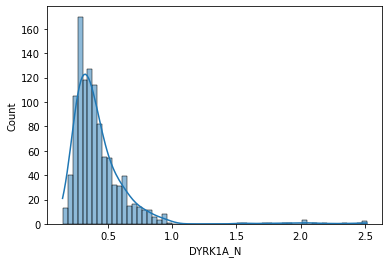

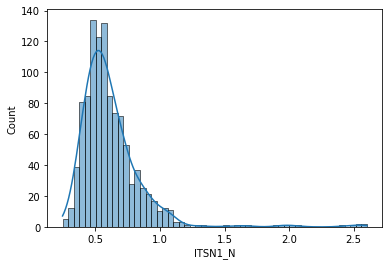

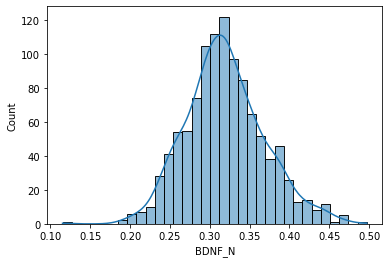

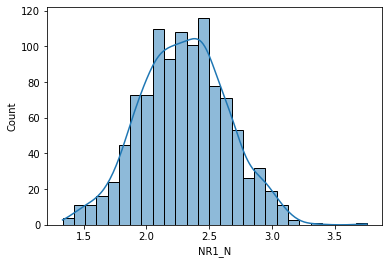

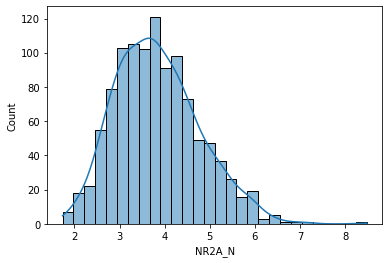

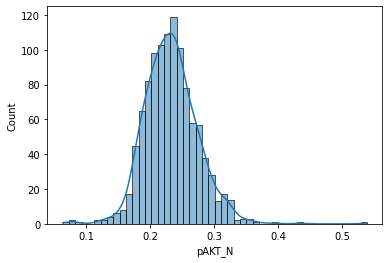

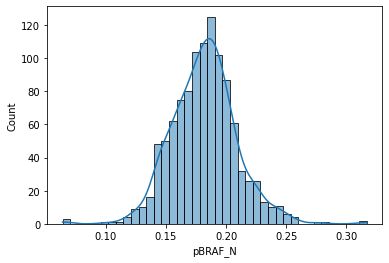

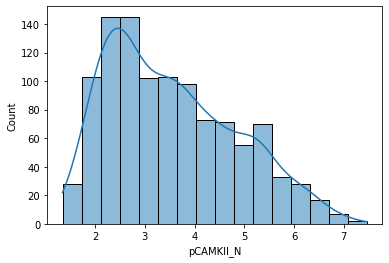

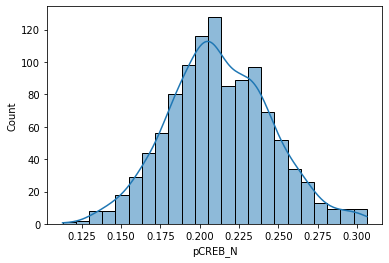

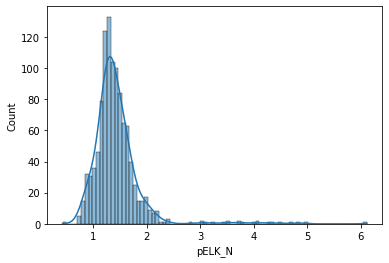

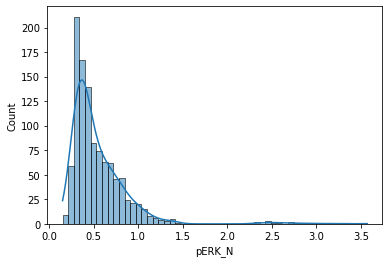

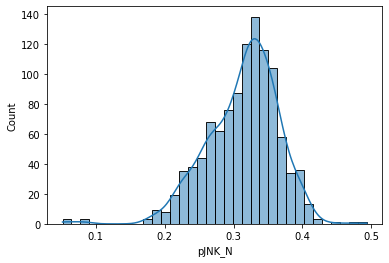

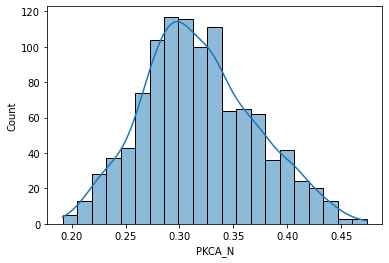

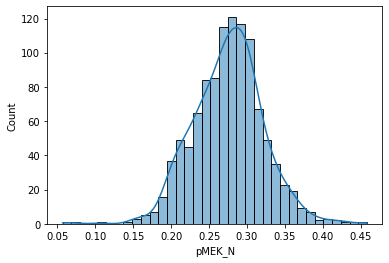

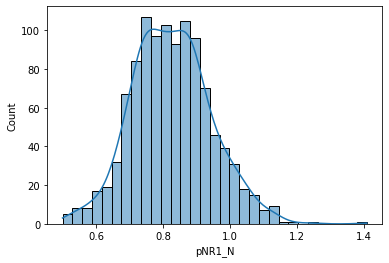

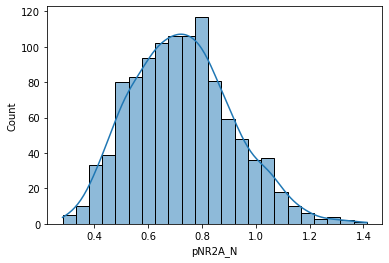

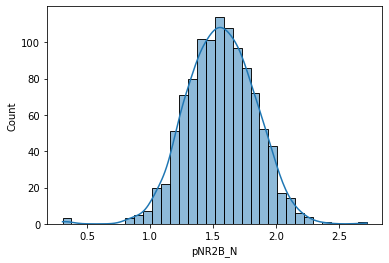

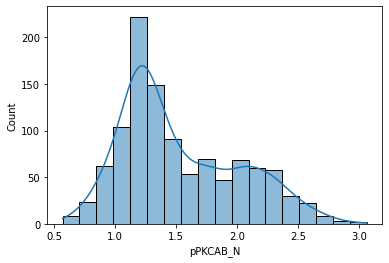

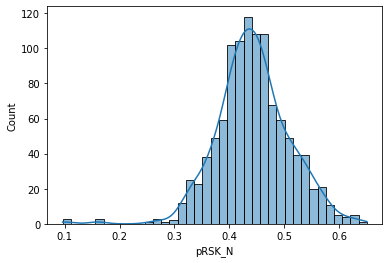

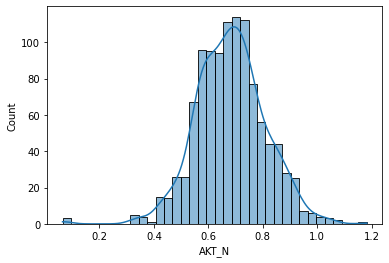

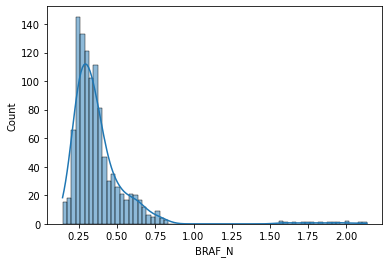

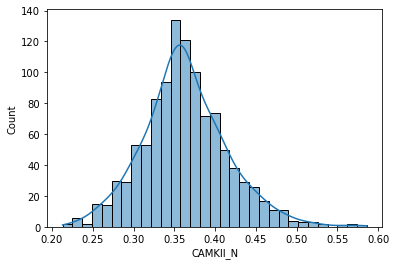

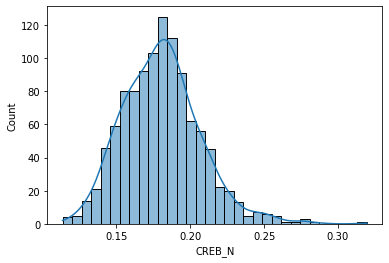

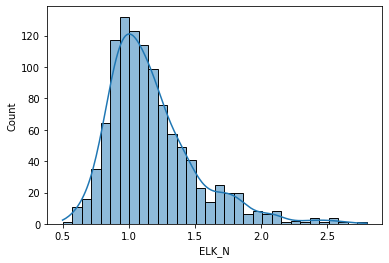

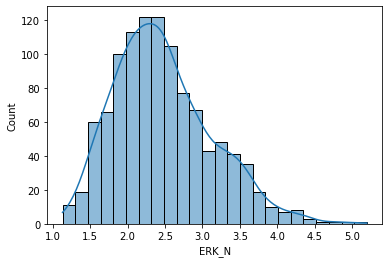

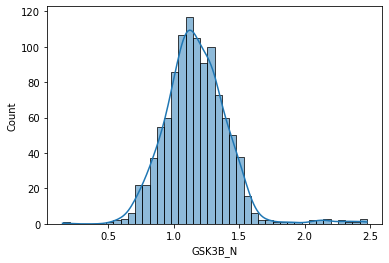

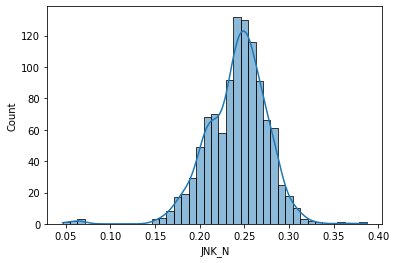

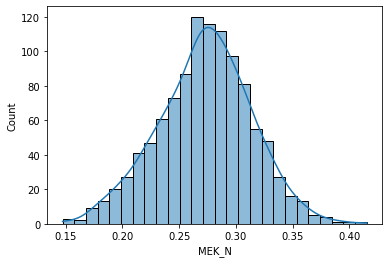

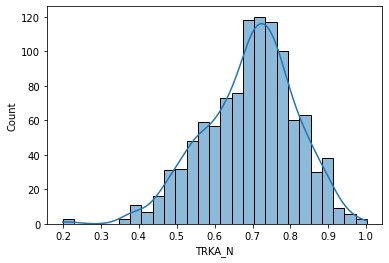

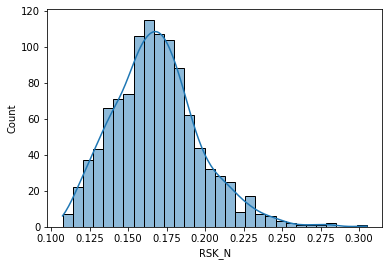

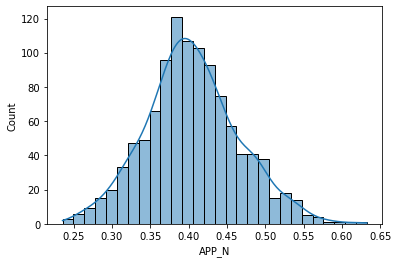

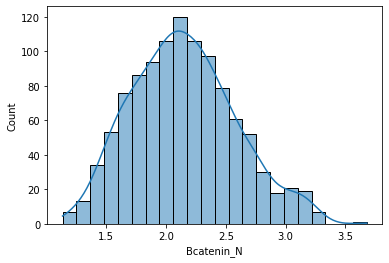

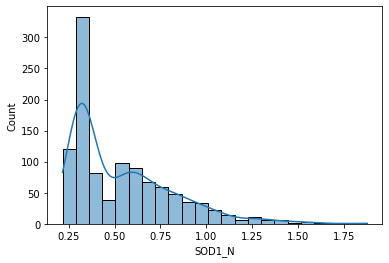

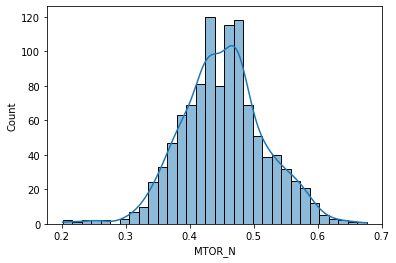

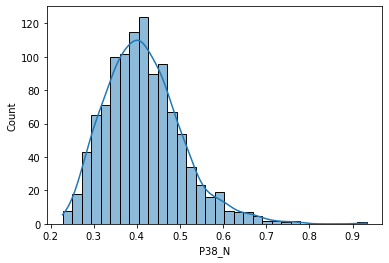

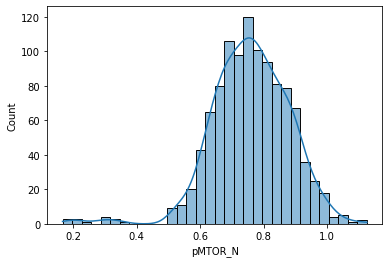

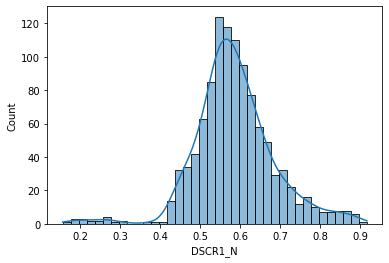

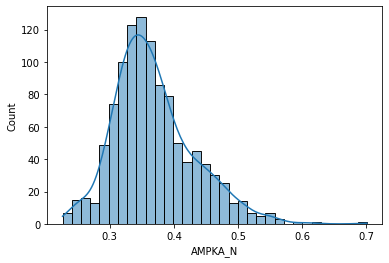

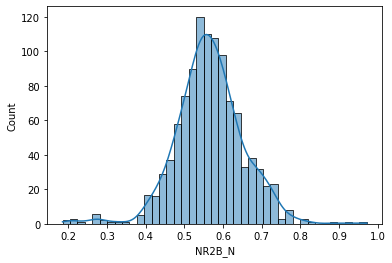

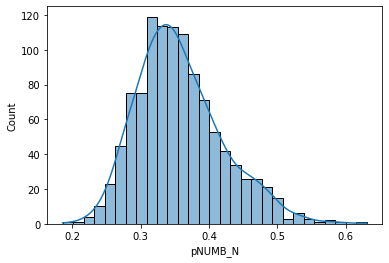

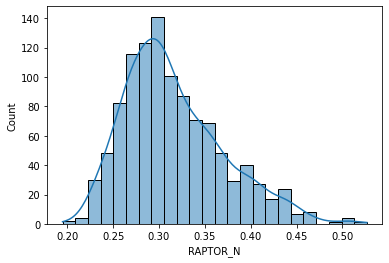

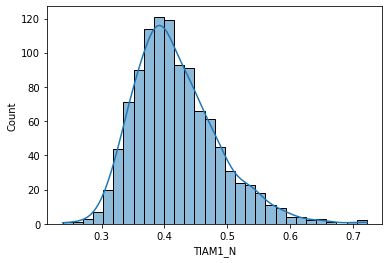

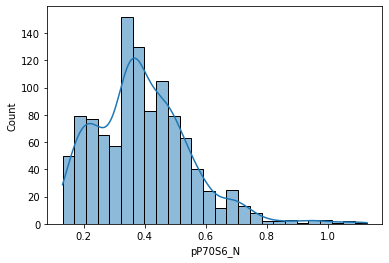

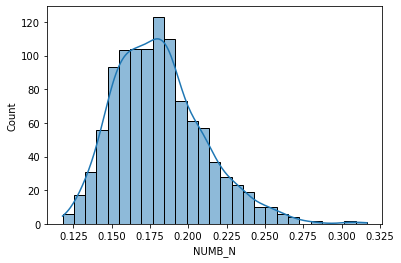

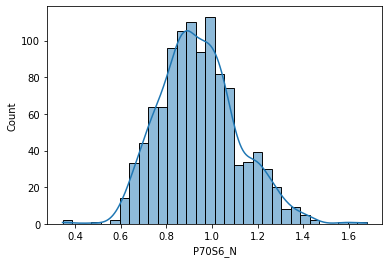

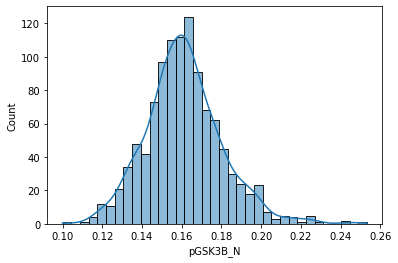

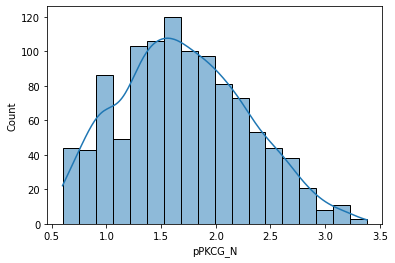

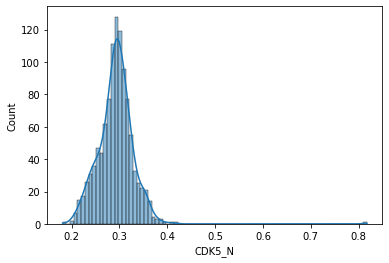

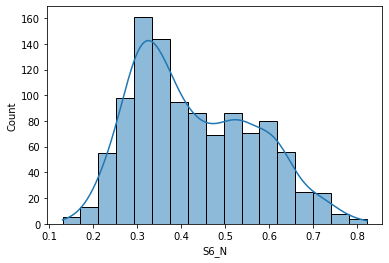

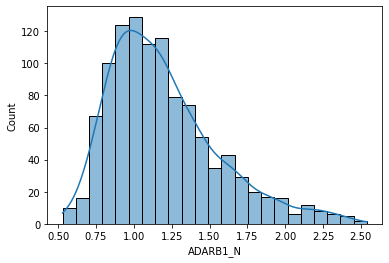

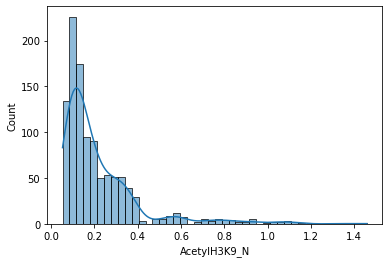

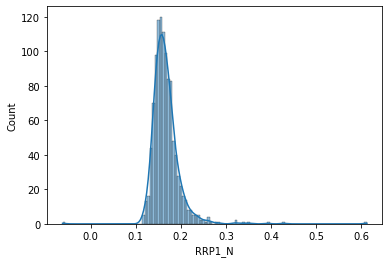

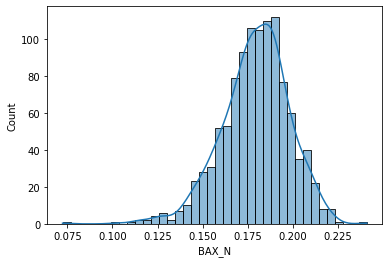

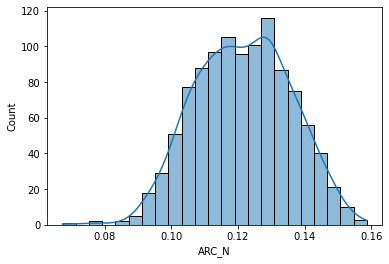

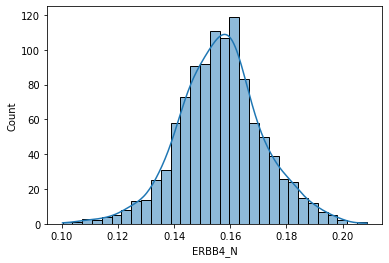

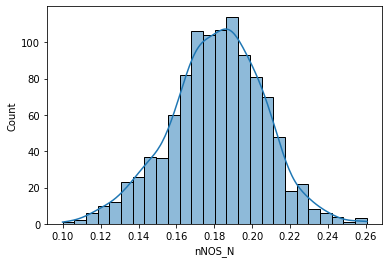

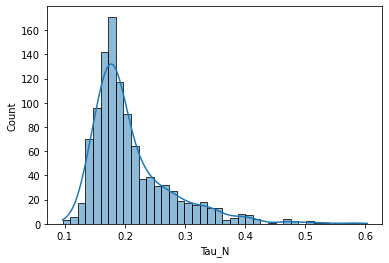

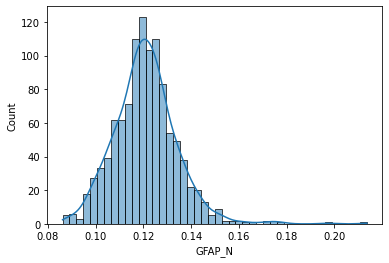

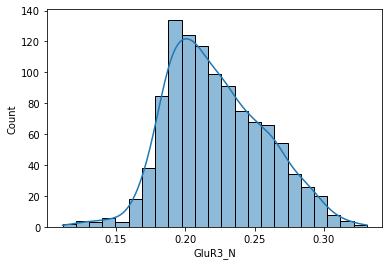

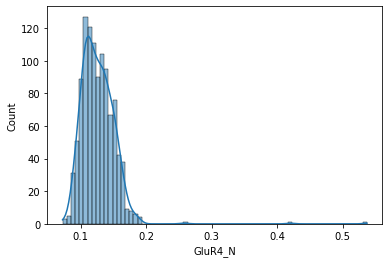

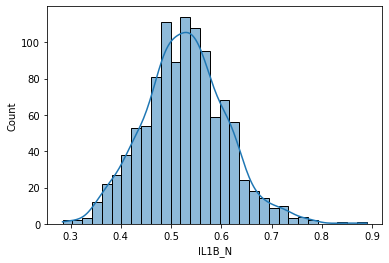

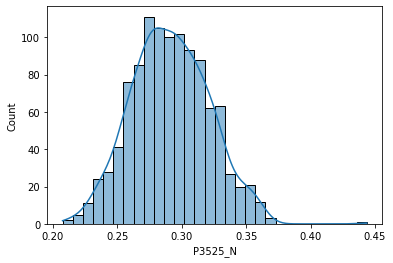

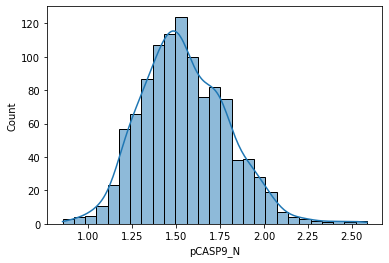

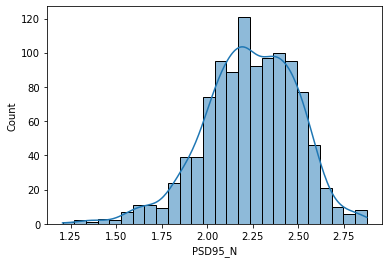

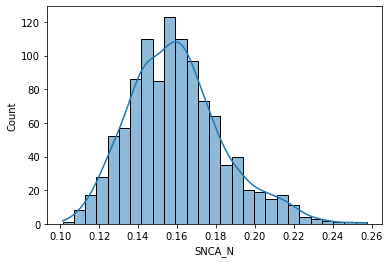

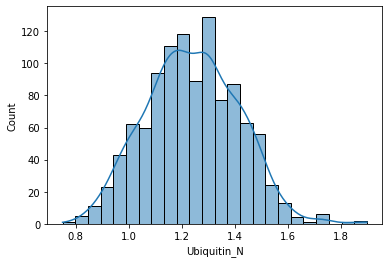

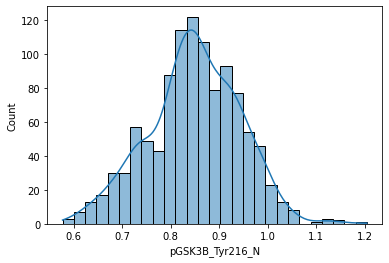

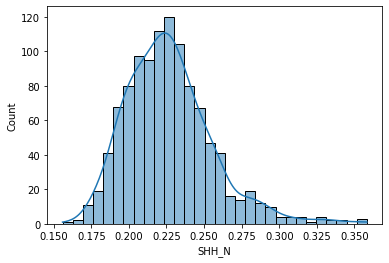

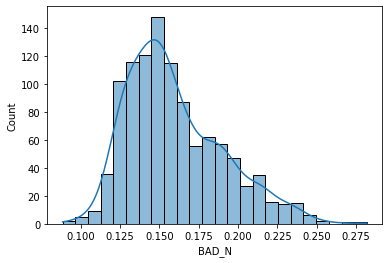

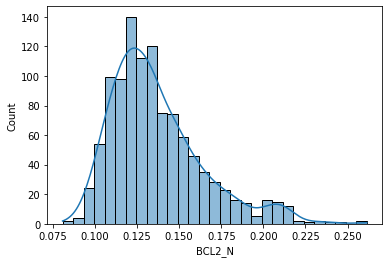

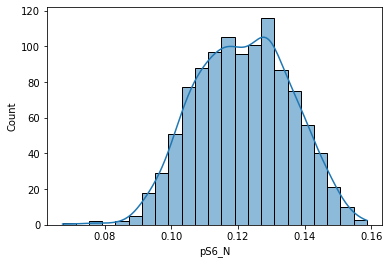

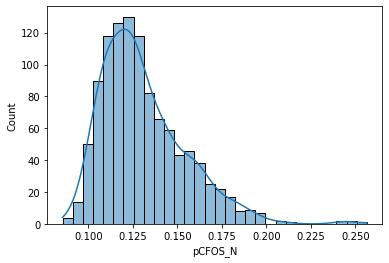

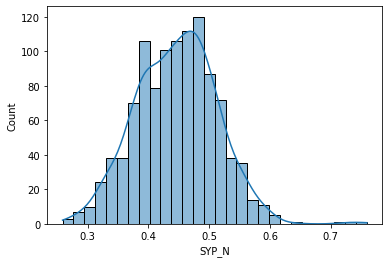

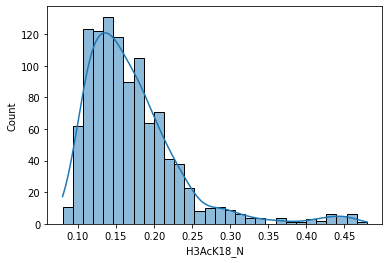

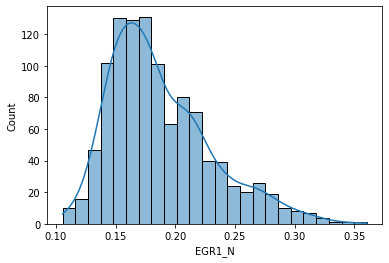

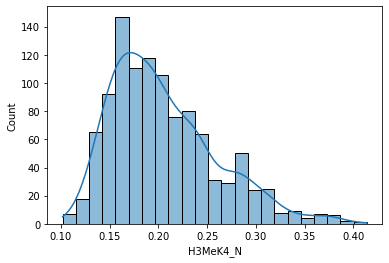

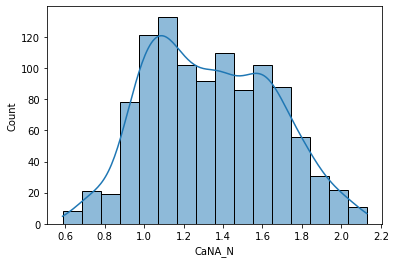

In [46]:
for feature in new_data.columns[:-4]:
    sns.histplot(data=new_data[feature], kde=True)
    plt.show()

### Categorical Features

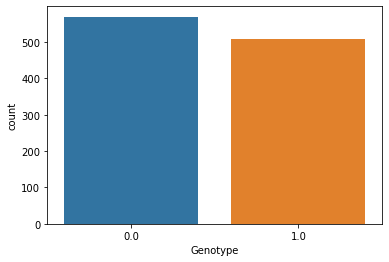

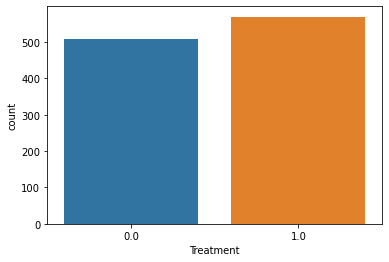

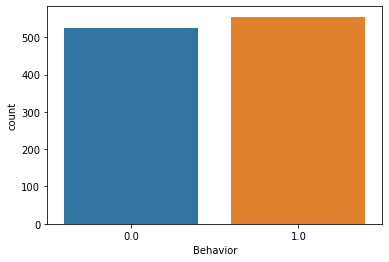

In [47]:
for feature in new_data.columns[-4:-1]:
    sns.countplot(x=new_data[feature])
    plt.show()

### Label

<AxesSubplot:xlabel='class', ylabel='count'>

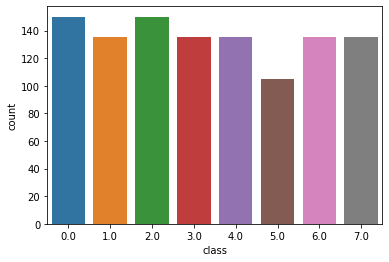

In [48]:
sns.countplot(x=new_data['class'])

Here we can see significant numbers of each class are present

## Scaling Dataset

### Standardization

In [49]:
scaler_standard=StandardScaler()
scaled_data1=scaler_standard.fit_transform(new_data.iloc[:, :-4])

In [52]:
scaled_data1=pd.DataFrame(scaled_data1, columns=new_data.columns[:-4])
scaled_data1=pd.concat([scaled_data1, new_data.iloc[:, -4:-1]], axis=1)
scaled_data1

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.313189  0.518116  2.253948  1.498269  2.304479 -0.345862 -0.160081   
1     0.357274  0.286685  1.880577  1.420957  1.977190 -0.518943 -0.335927   
2     0.335443  0.450647  2.013218  1.125970  1.909634 -0.582105 -0.228342   
3     0.065963  0.000083  0.802473  0.490937  1.220380 -0.248281 -0.200923   
4     0.037172  0.001491  0.806041  0.199268  0.940600 -0.483580 -0.305933   
...        ...       ...       ...       ...       ...       ...       ...   
1075 -0.686299 -0.610983 -1.302570 -0.589869 -1.332018 -0.516550 -0.393515   
1076 -0.616646 -0.568895 -1.367950 -0.390040 -1.115921  0.434716  0.022519   
1077 -0.791401 -0.883351 -1.723358 -1.624639 -1.738759 -0.301709 -0.757427   
1078 -0.821360 -0.812823 -1.523414 -1.211872 -1.563660 -0.584852 -0.306066   
1079 -0.494402 -0.621065 -1.268004 -0.587826 -1.338119  0.428164  0.367471   

      pCAMKII_N   pCREB_N    pELK_N  ...     pS6_N   pCFOS_N     SYP_N  \
0     -0.898792  0.603178  0.692467  ... -1.066276 -0.943776 -0.285744   
1     -0.961898  0.441743  0.360907  ... -1.046167 -1.113619 -0.067645   
2     -0.968714  0.542406  0.285694  ... -0.926271 -1.033191 -0.155059   
3     -1.070058 -0.172068  0.358138  ... -1.285019 -0.820164 -0.818989   
4     -1.084201 -0.628442  0.163232  ... -1.172895 -0.844161 -0.179502   
...         ...       ...       ...  ...       ...       ...       ...   
1075  -0.813721 -0.162451 -0.794086  ... -0.400501  2.224079 -1.084095   
1076  -0.791295  0.114887 -0.744363  ... -0.554066  1.900899 -1.066451   
1077  -1.195796 -0.843421 -1.166556  ... -0.180275  1.166759 -0.360708   
1078  -1.121314 -0.631947 -1.084497  ...  0.264492  2.772063 -0.728860   
1079  -0.908018  0.339053 -0.780970  ... -0.183757  2.402854 -0.387434   

      H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  
0     -0.880765 -1.303241 -1.426004  1.065901       0.0        1.0       0.0  
1     -0.924728 -1.225790 -1.371943  1.280291       0.0        1.0       0.0  
2     -0.926146 -1.266495 -1.439911  1.857038       0.0        1.0       0.0  
3     -0.636331 -0.937272 -1.081050  1.144490       0.0        1.0       0.0  
4     -0.822900 -1.103957 -1.053793  1.583530       0.0        1.0       0.0  
...         ...       ...       ...       ...       ...        ...       ...  
1075   2.311153  0.400353  2.262891  0.085303       1.0        0.0       1.0  
1076   2.418454  0.301096  1.619779  0.084215       1.0        0.0       1.0  
1077   2.350645  0.973892  2.758444  0.293525       1.0        0.0       1.0  
1078   2.579566  1.491103  2.945342  0.208996       1.0        0.0       1.0  
1079   2.565884  1.530339  2.943957  0.104788       1.0        0.0       1.0  

[1080 rows x 80 columns]

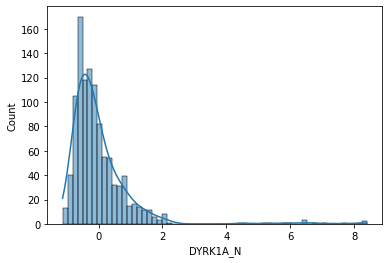

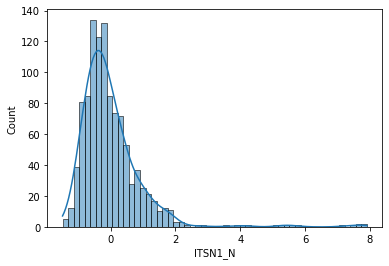

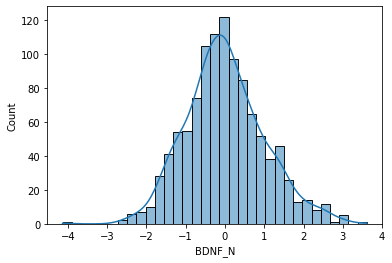

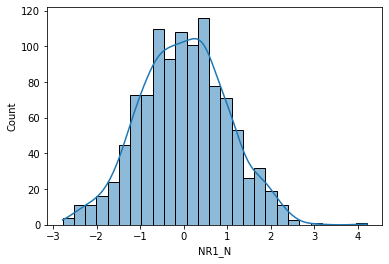

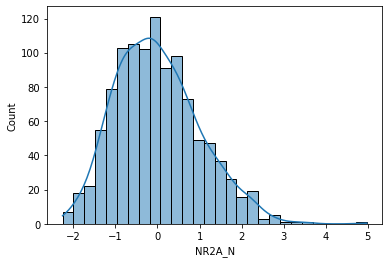

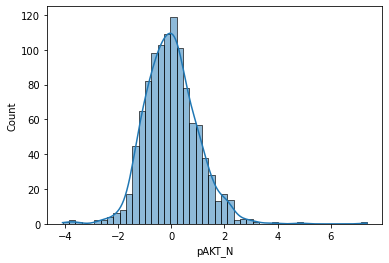

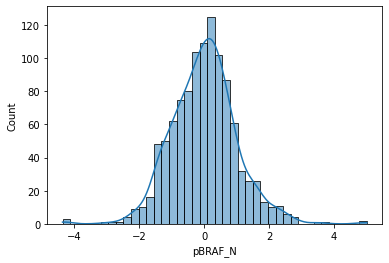

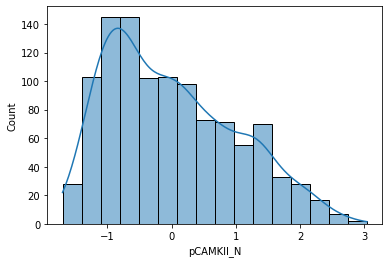

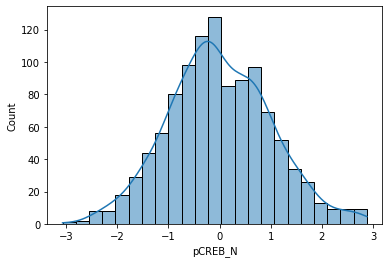

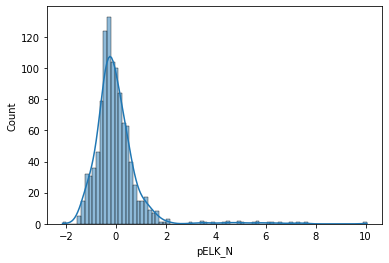

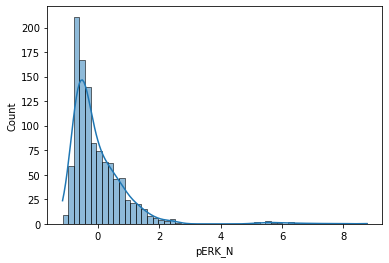

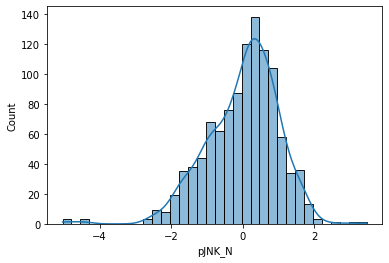

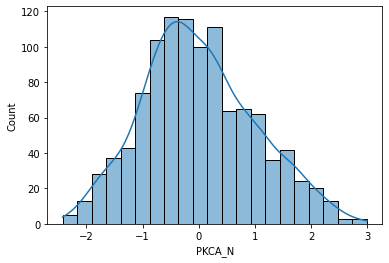

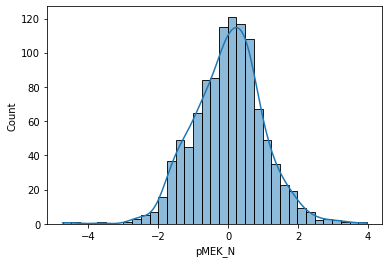

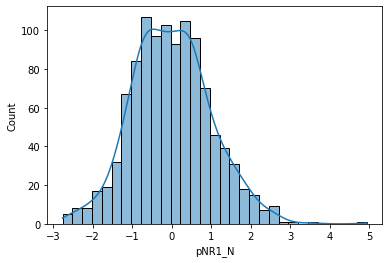

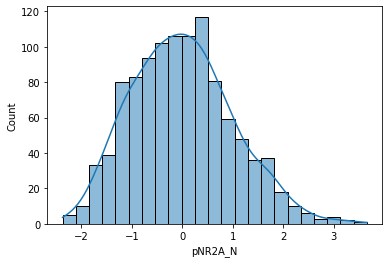

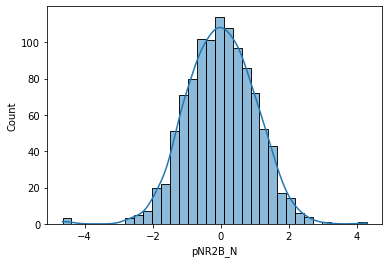

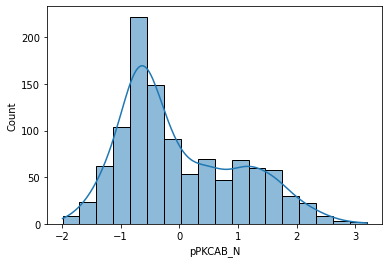

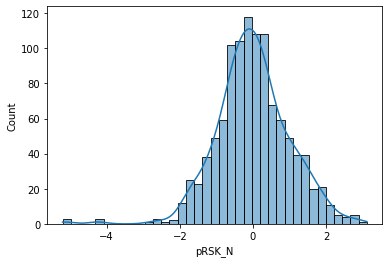

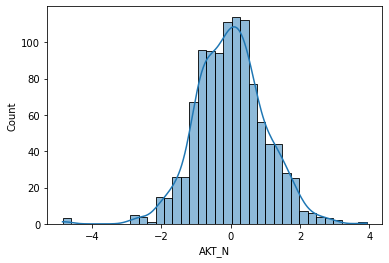

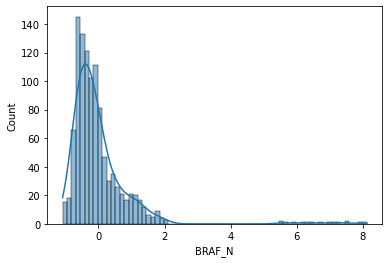

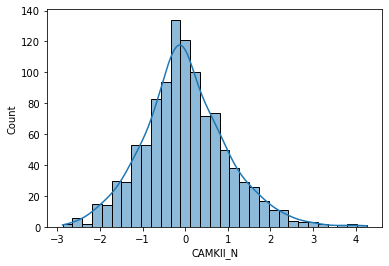

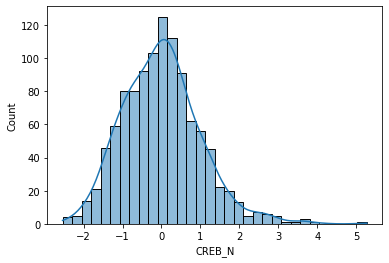

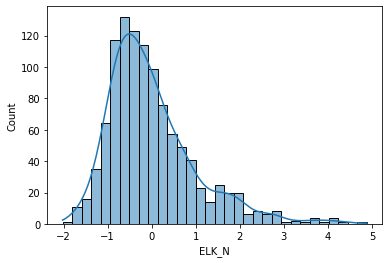

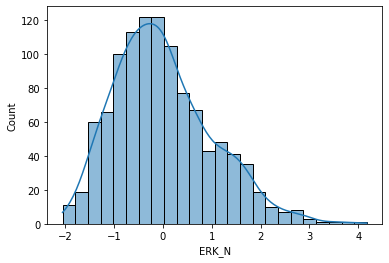

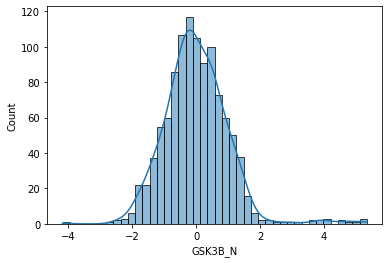

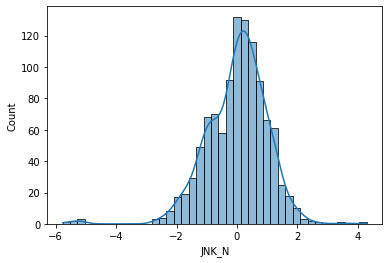

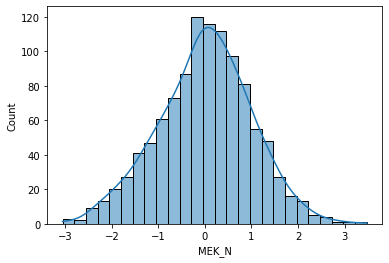

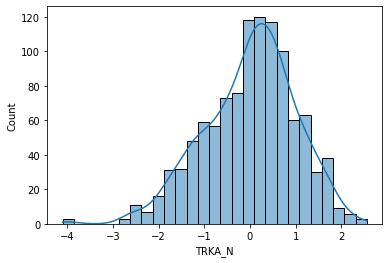

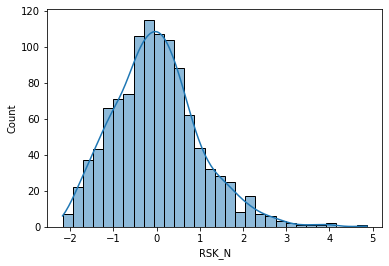

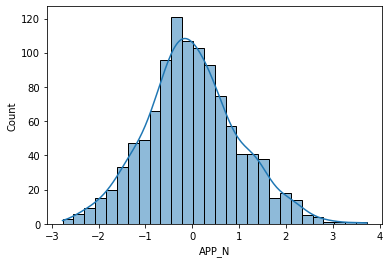

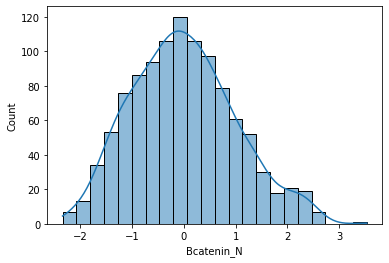

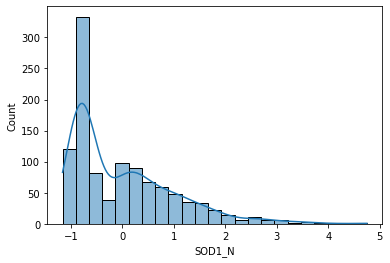

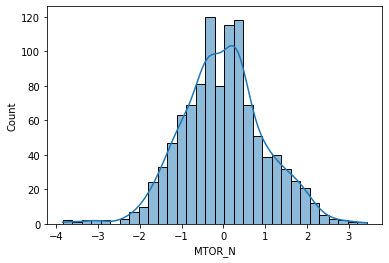

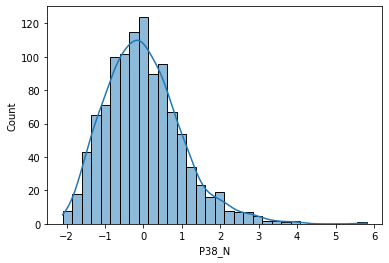

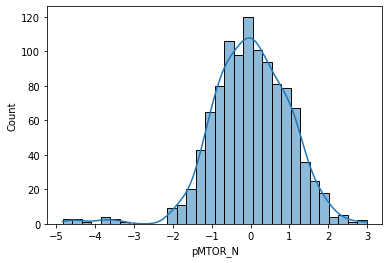

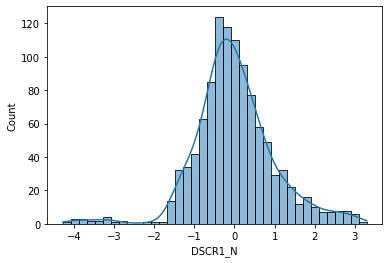

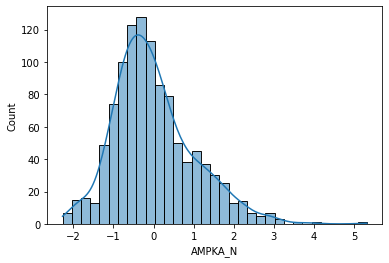

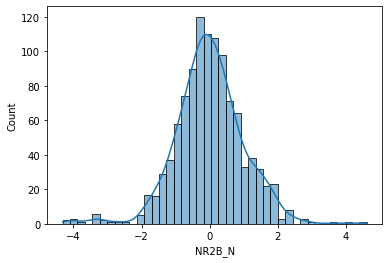

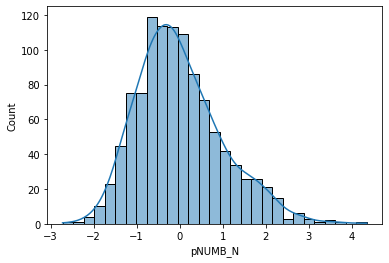

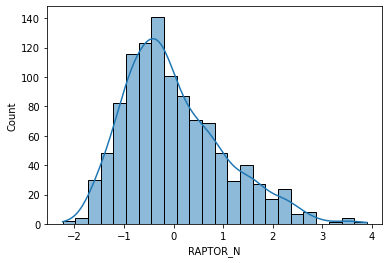

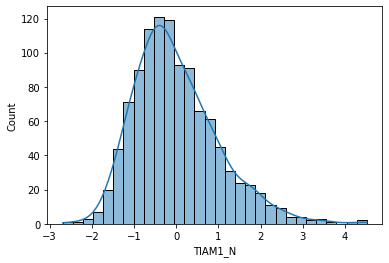

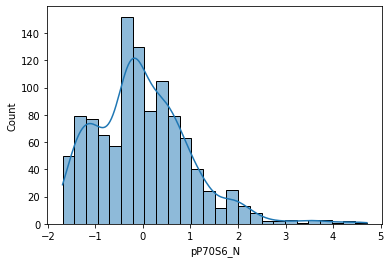

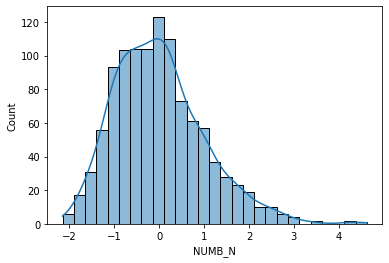

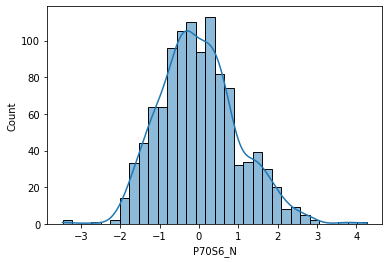

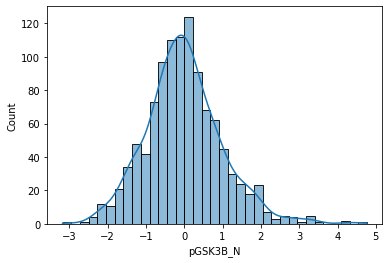

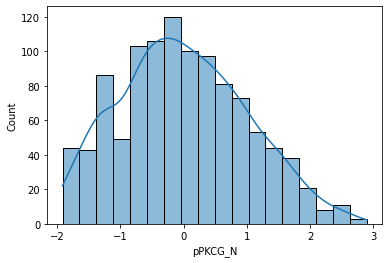

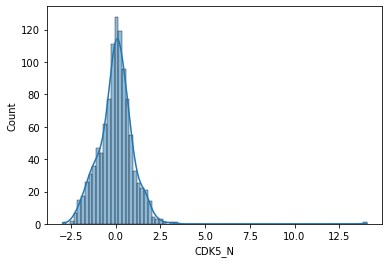

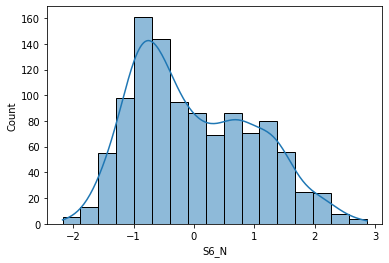

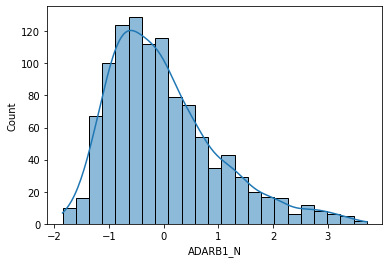

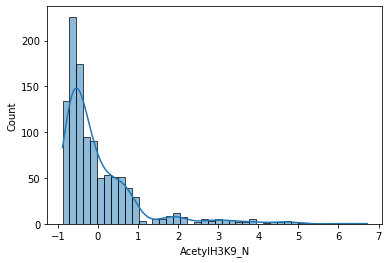

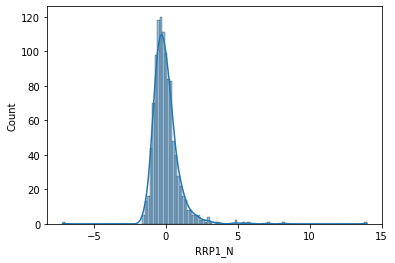

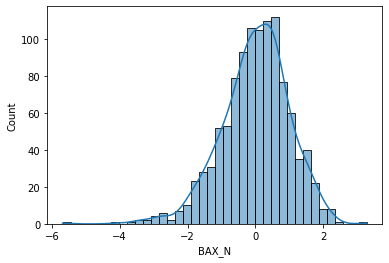

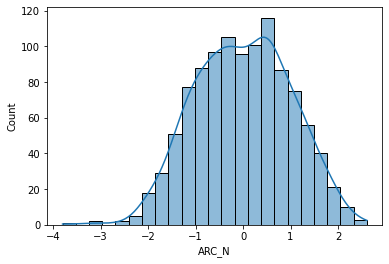

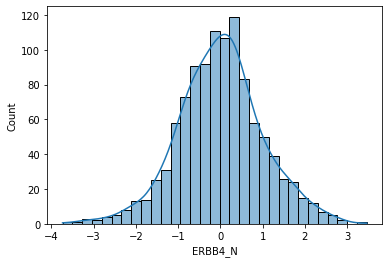

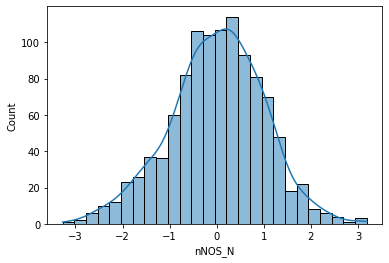

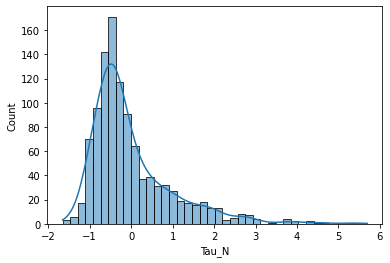

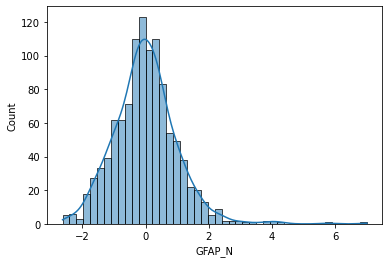

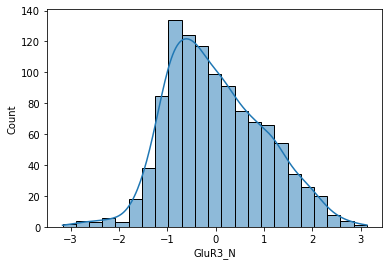

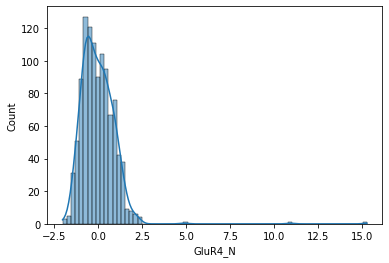

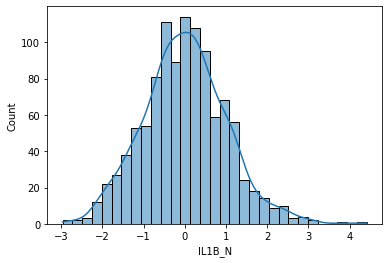

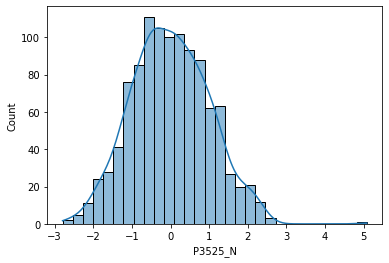

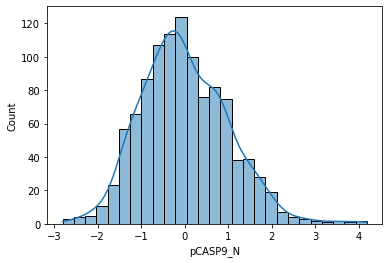

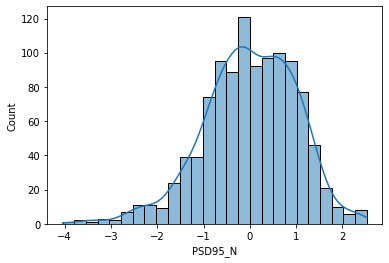

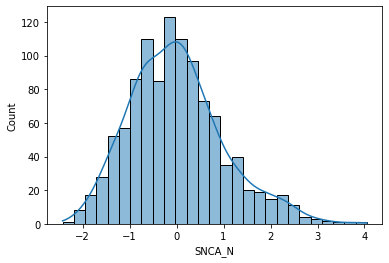

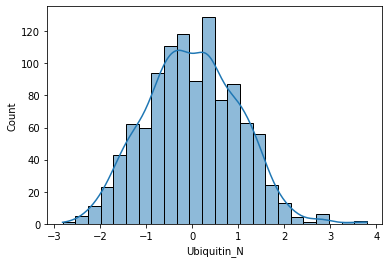

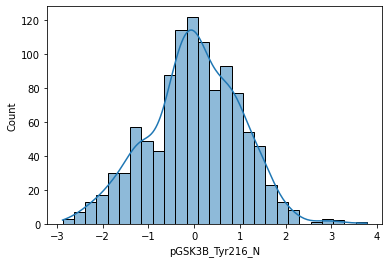

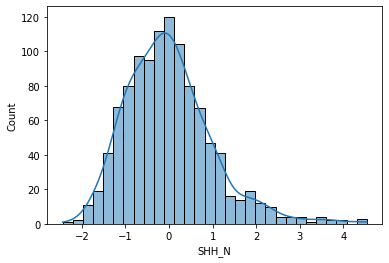

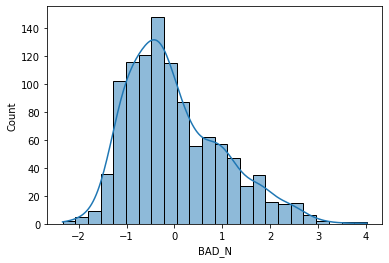

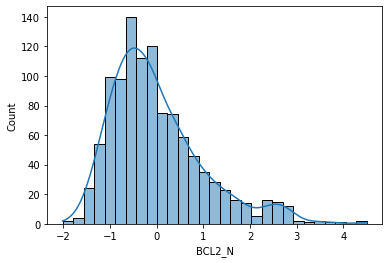

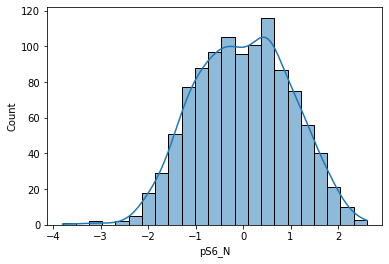

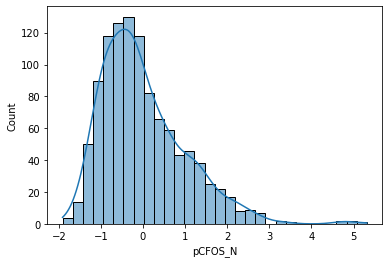

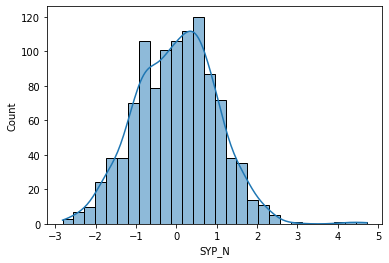

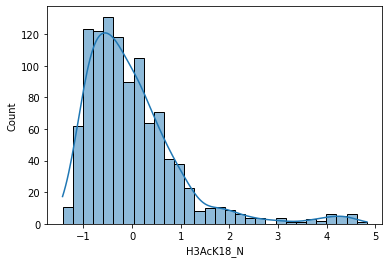

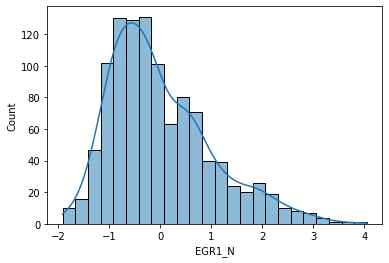

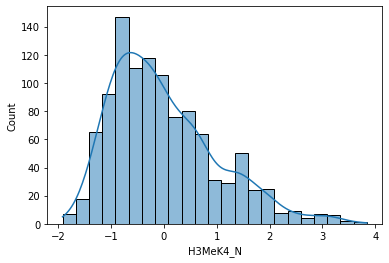

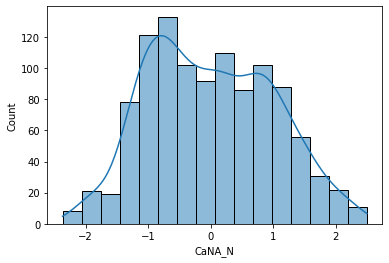

In [53]:
for feature in new_data.columns[:-4]:
    sns.histplot(data=scaled_data1[feature], kde=True)
    plt.show()

### Normalisation

In [54]:
scaler_norm=MinMaxScaler()
scaled_data2=scaler_norm.fit_transform(new_data.iloc[:, :-4])

In [55]:
scaled_data2=pd.DataFrame(scaled_data2, columns=new_data.columns[:-4])
scaled_data2=pd.concat([scaled_data2, new_data.iloc[:, -4:-1]], axis=1)
scaled_data2

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.151122  0.212885  0.824638  0.612119  0.630482  0.327006  0.448666   
1     0.155750  0.188226  0.776455  0.601070  0.585247  0.311887  0.429899   
2     0.153459  0.205696  0.793572  0.558911  0.575910  0.306369  0.441381   
3     0.125169  0.157688  0.637326  0.468152  0.480646  0.335530  0.444307   
4     0.122146  0.157838  0.637787  0.426467  0.441977  0.314976  0.433100   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.046197  0.092577  0.365672  0.313684  0.127872  0.312096  0.423753   
1076  0.053509  0.097062  0.357235  0.342243  0.157739  0.395191  0.468154   
1077  0.035163  0.063556  0.311370  0.165795  0.071655  0.330863  0.384915   
1078  0.032018  0.071071  0.337173  0.224787  0.095856  0.306129  0.433086   
1079  0.066342  0.091503  0.370133  0.313976  0.127028  0.394619  0.504969   

      pCAMKII_N   pCREB_N    pELK_N  ...     pS6_N   pCFOS_N     SYP_N  \
0      0.168257  0.617322  0.232553  ...  0.426816  0.133930  0.336299   
1      0.154925  0.590173  0.205362  ...  0.429952  0.110434  0.365208   
2      0.153485  0.607102  0.199194  ...  0.448652  0.121560  0.353621   
3      0.132074  0.486945  0.205135  ...  0.392700  0.151031  0.265619   
4      0.129086  0.410194  0.189152  ...  0.410187  0.147711  0.350381   
...         ...       ...       ...  ...       ...       ...       ...   
1075   0.186230  0.488562  0.110645  ...  0.530654  0.572176  0.230480   
1076   0.190968  0.535204  0.114722  ...  0.506703  0.527466  0.232818   
1077   0.105509  0.374040  0.080099  ...  0.565002  0.425904  0.326363   
1078   0.121245  0.409605  0.086829  ...  0.634370  0.647984  0.277565   
1079   0.166308  0.572903  0.111720  ...  0.564459  0.596908  0.322821   

      H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  
0      0.087715  0.102890  0.084580  0.705738       0.0        1.0       0.0  
1      0.080692  0.115874  0.093977  0.749771       0.0        1.0       0.0  
2      0.080465  0.109050  0.082162  0.868229       0.0        1.0       0.0  
3      0.126763  0.164241  0.144543  0.721879       0.0        1.0       0.0  
4      0.096959  0.136298  0.149281  0.812053       0.0        1.0       0.0  
...         ...       ...       ...       ...       ...        ...       ...  
1075   0.597619  0.388482  0.725820  0.504334       1.0        0.0       1.0  
1076   0.614760  0.371843  0.614028  0.504110       1.0        0.0       1.0  
1077   0.603927  0.484631  0.811962  0.547100       1.0        0.0       1.0  
1078   0.640497  0.571336  0.844450  0.529739       1.0        0.0       1.0  
1079   0.638311  0.577914  0.844210  0.508336       1.0        0.0       1.0  

[1080 rows x 80 columns]

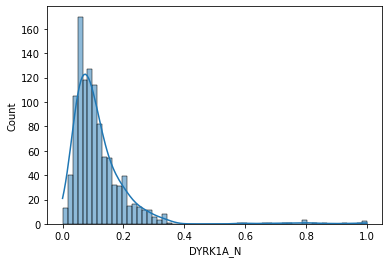

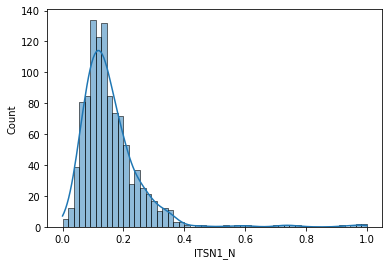

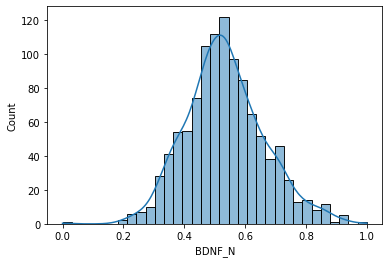

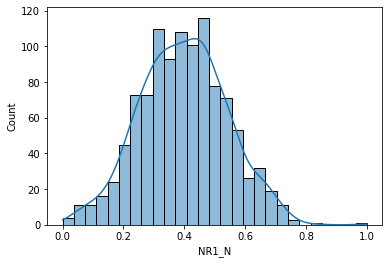

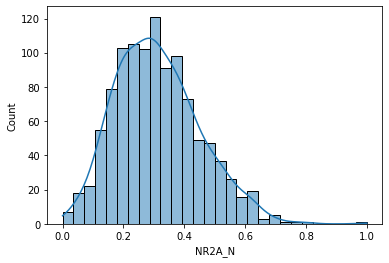

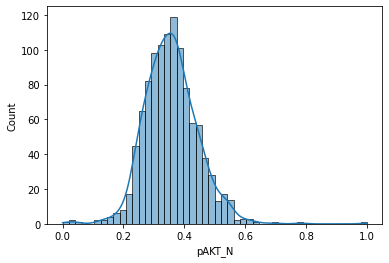

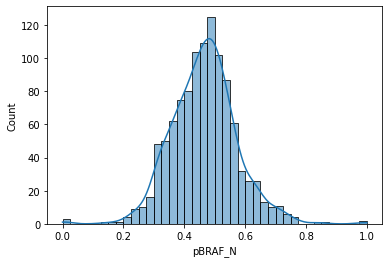

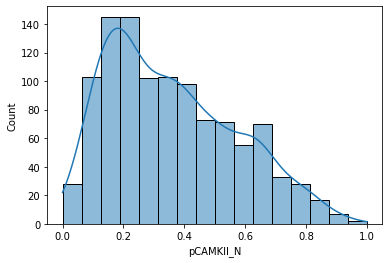

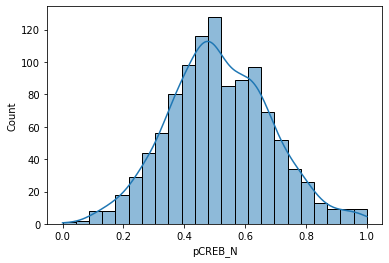

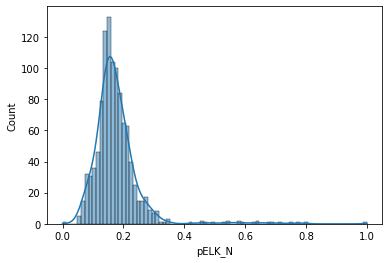

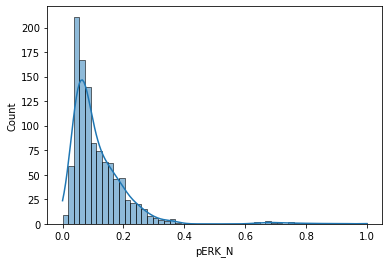

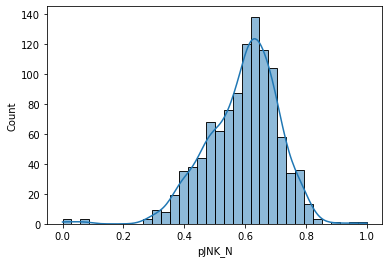

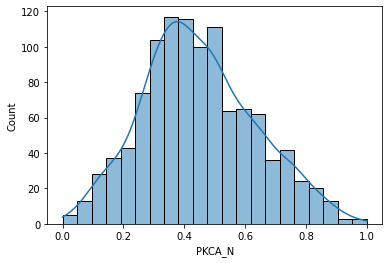

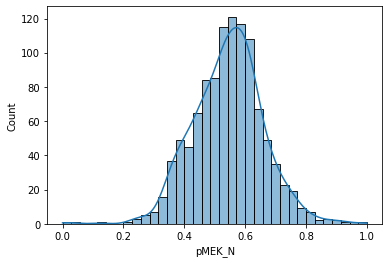

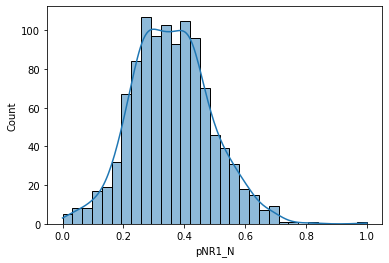

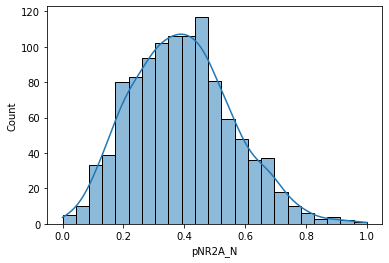

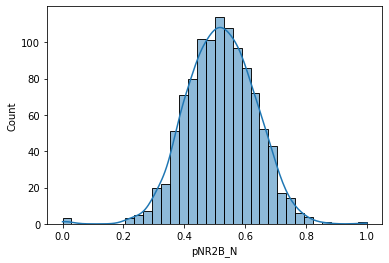

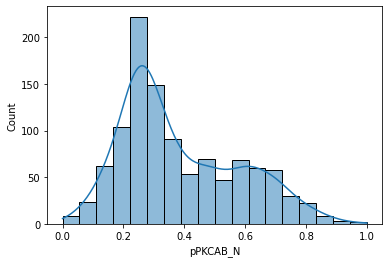

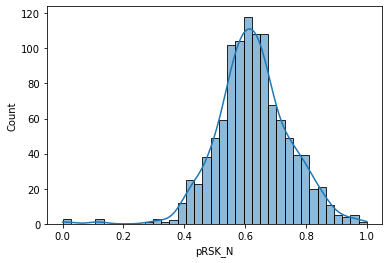

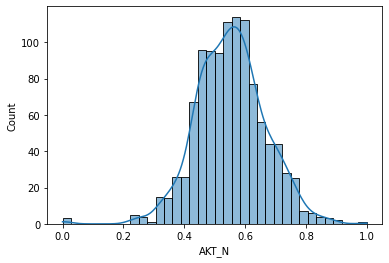

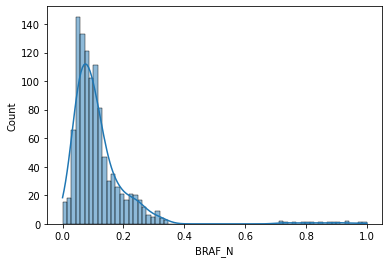

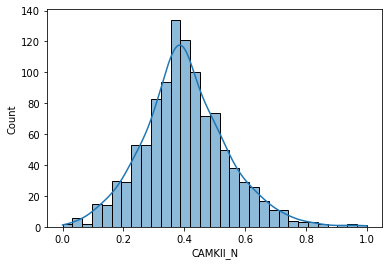

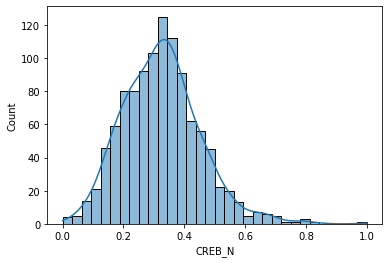

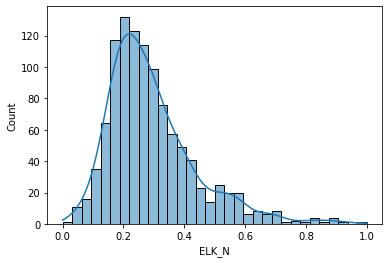

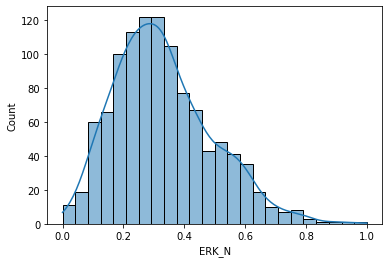

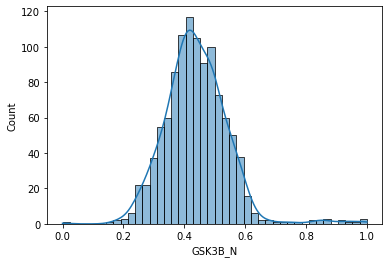

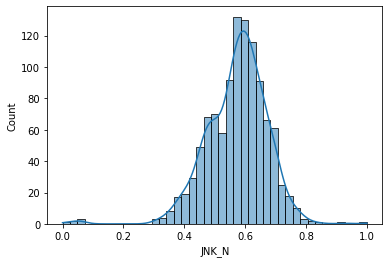

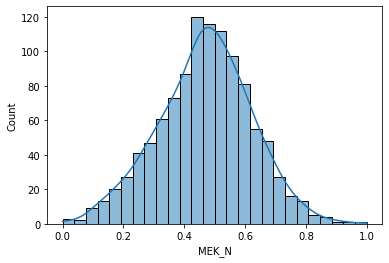

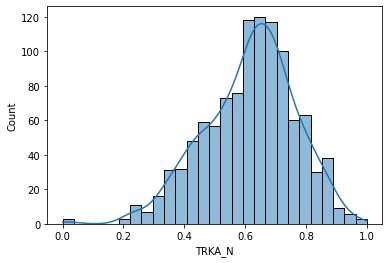

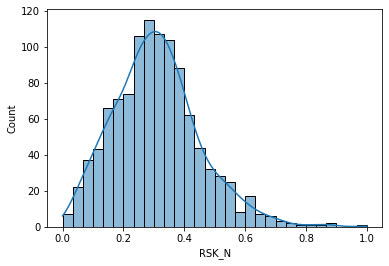

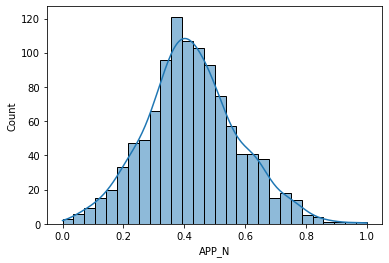

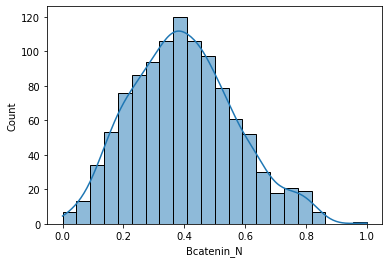

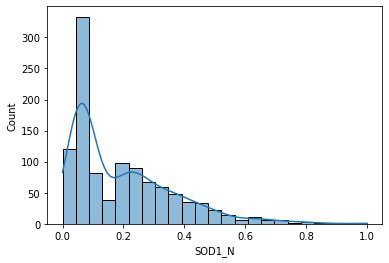

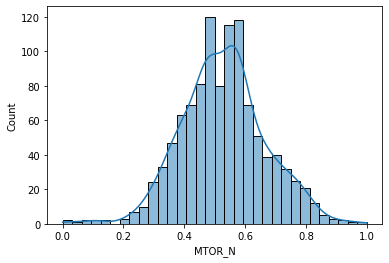

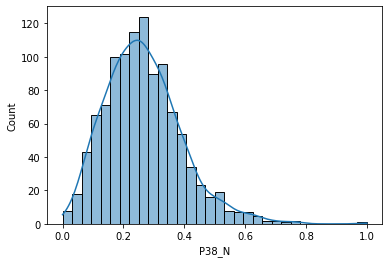

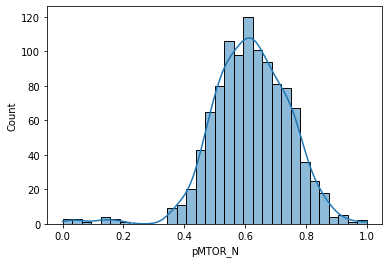

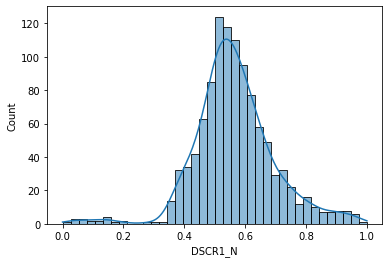

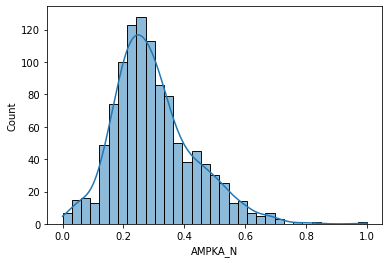

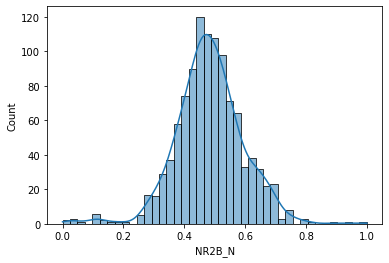

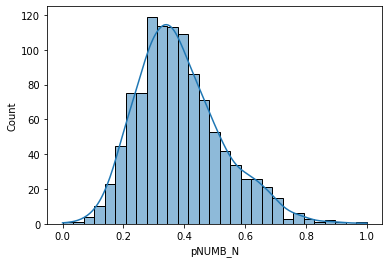

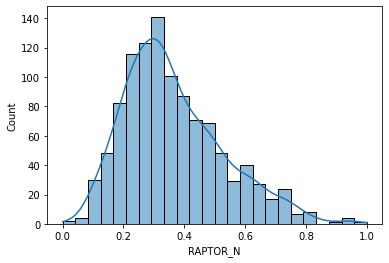

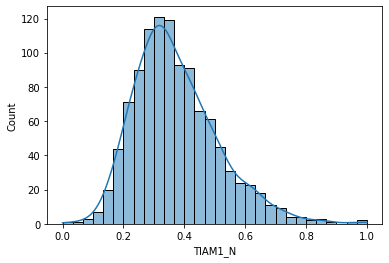

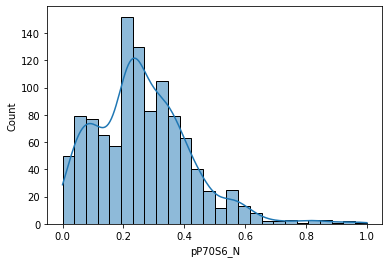

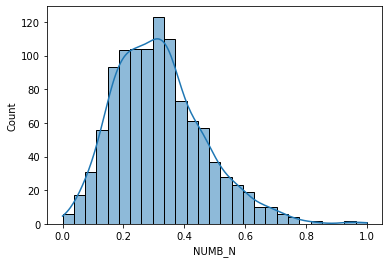

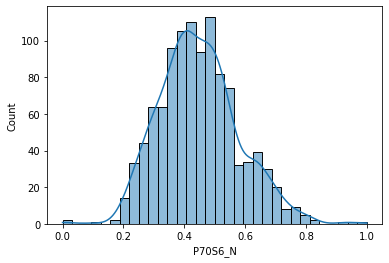

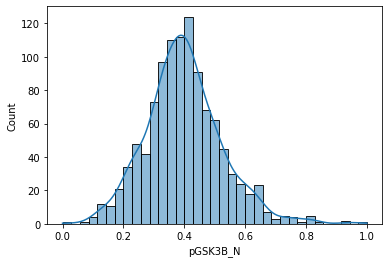

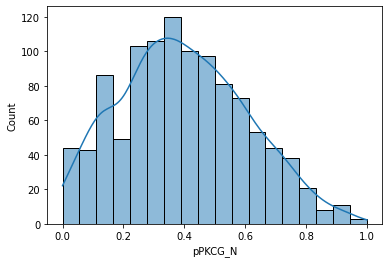

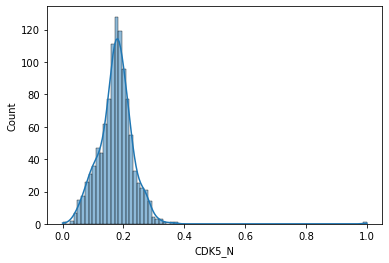

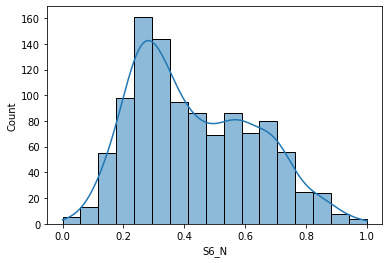

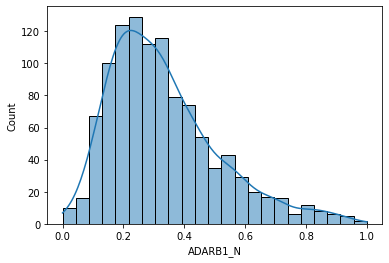

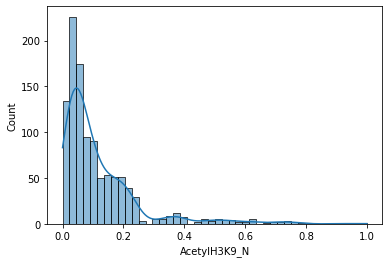

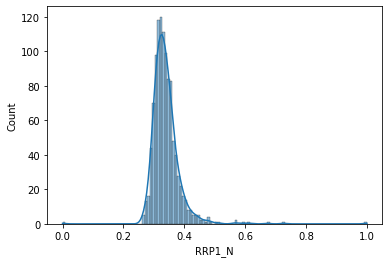

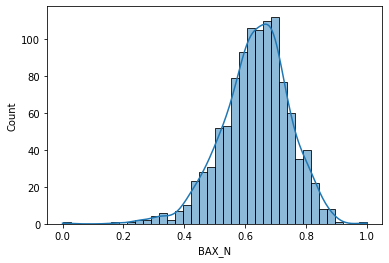

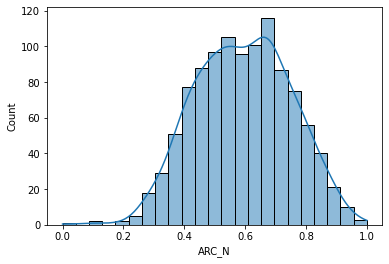

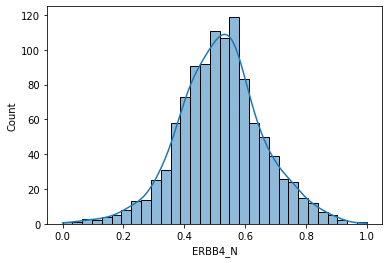

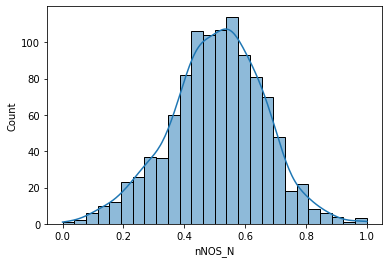

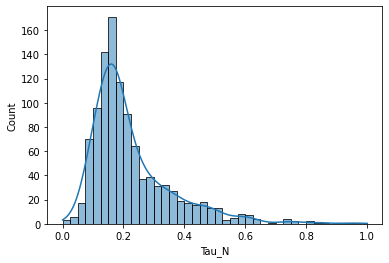

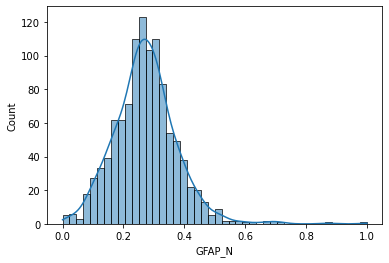

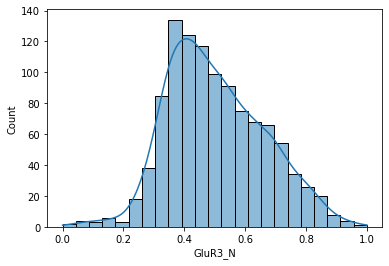

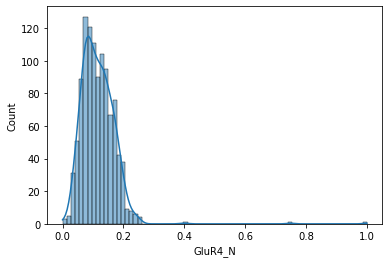

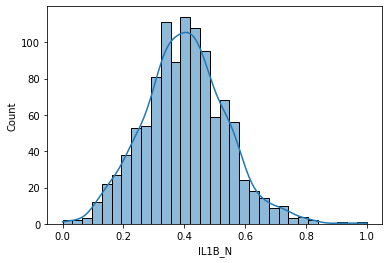

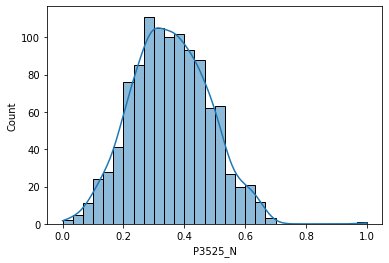

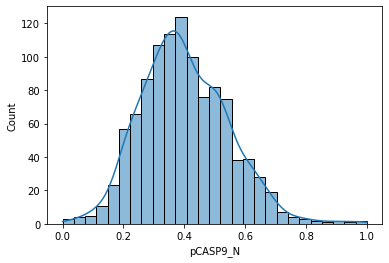

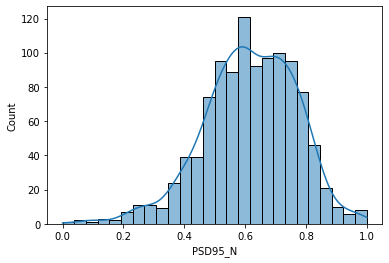

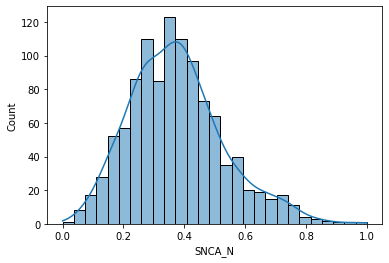

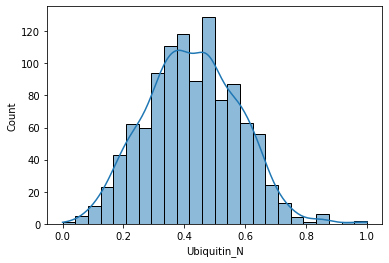

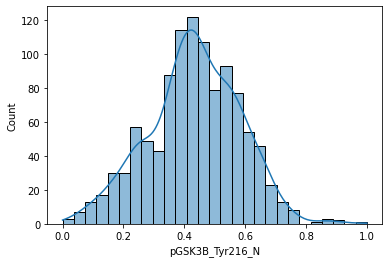

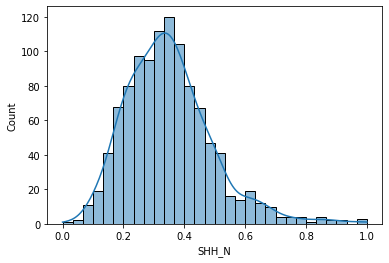

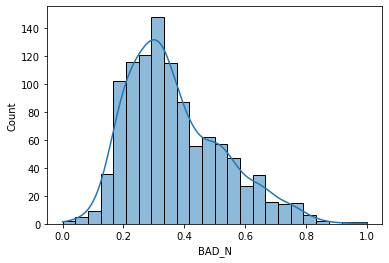

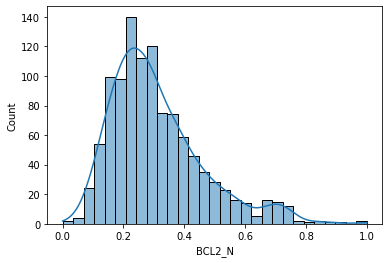

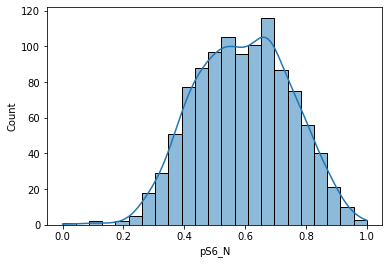

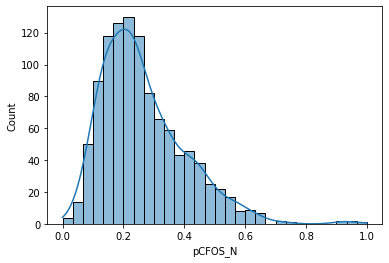

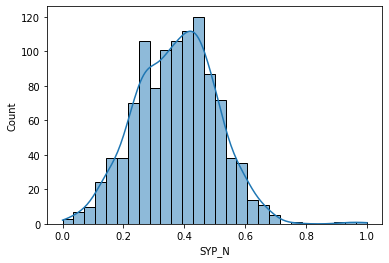

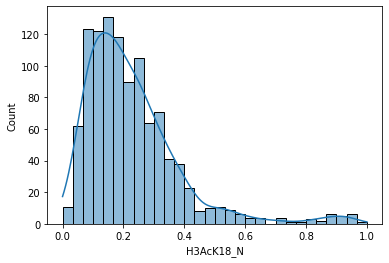

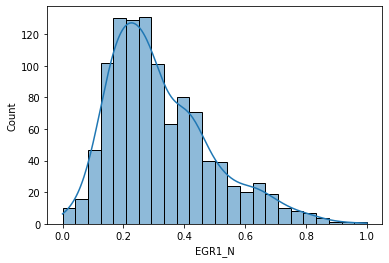

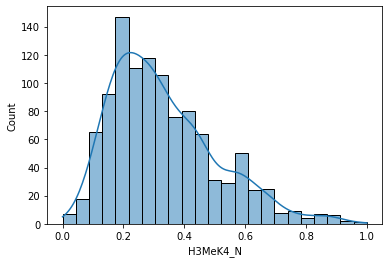

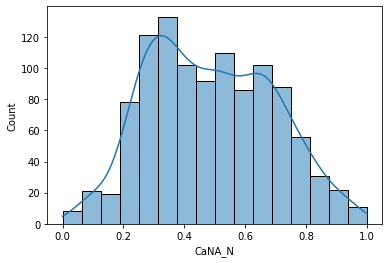

In [56]:
for feature in new_data.columns[:-4]:
    sns.histplot(data=scaled_data2[feature], kde=True)
    plt.show()

### Conclusion:
The dataset neither be Normalised nor Standartized, so we have to choose such model that is independent of scaling i.e tree based model

## Outliers

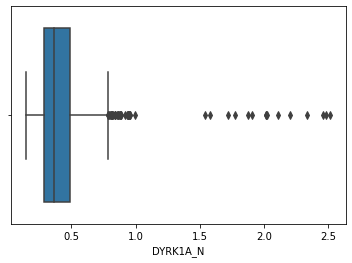

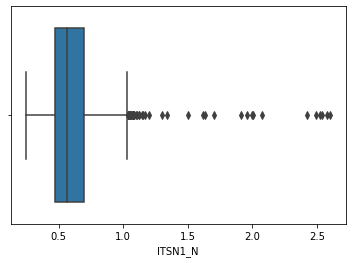

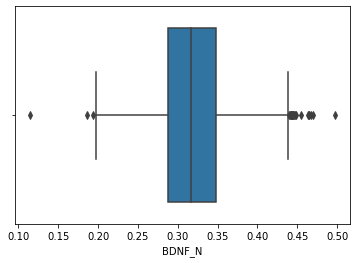

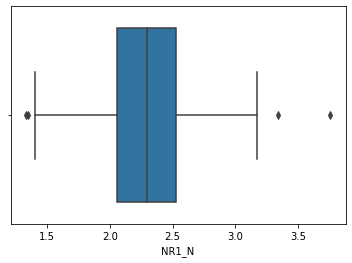

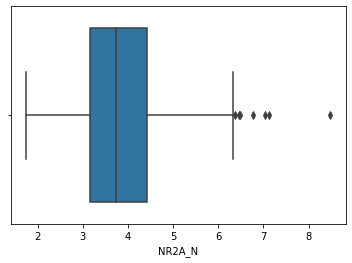

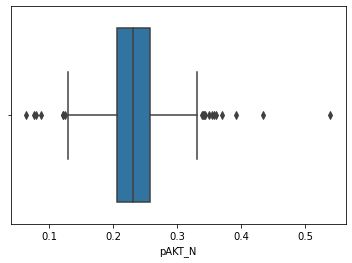

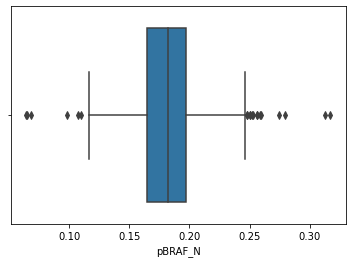

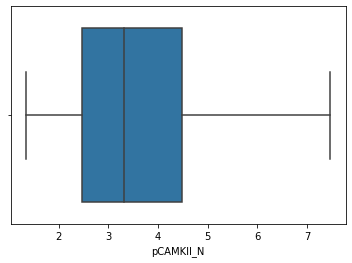

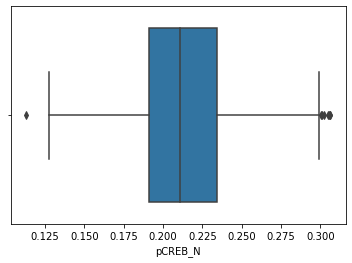

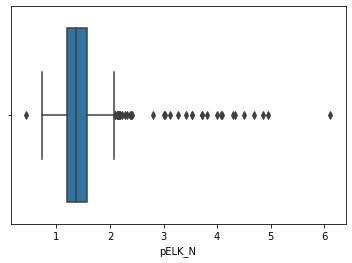

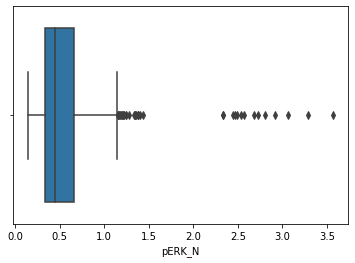

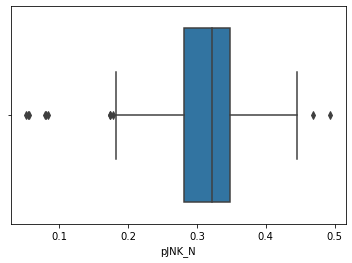

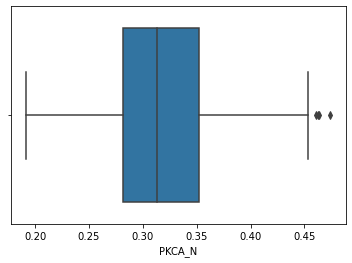

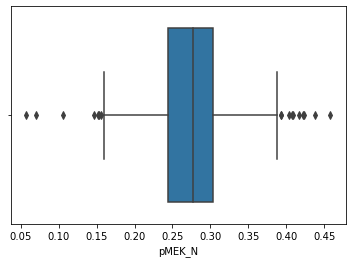

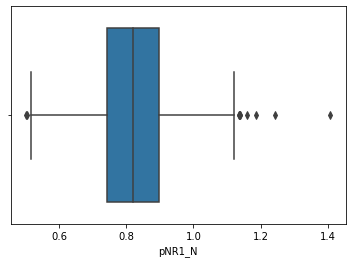

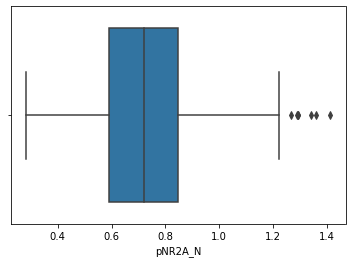

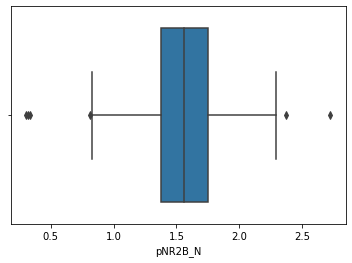

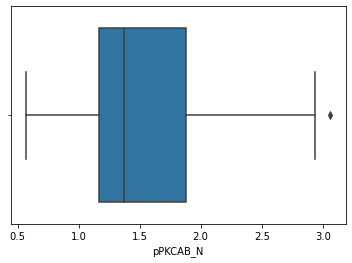

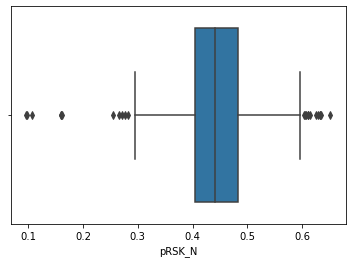

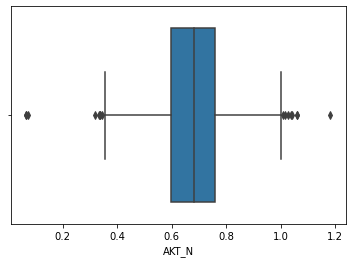

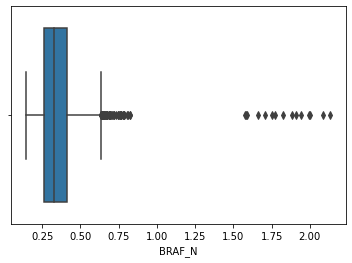

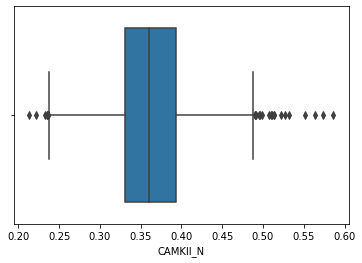

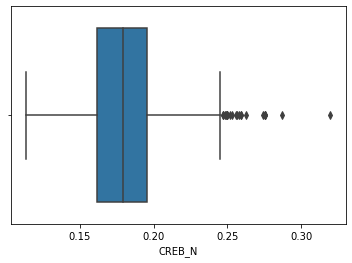

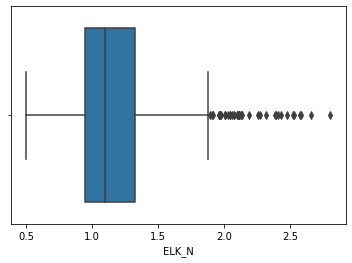

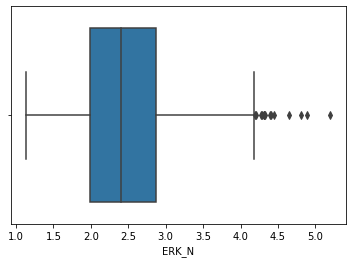

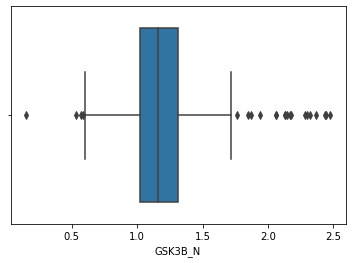

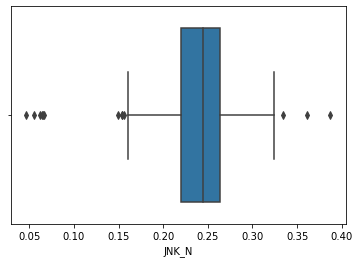

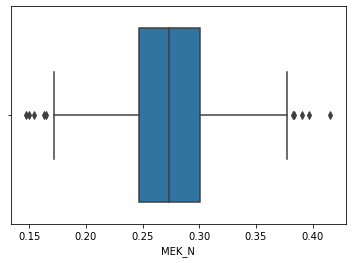

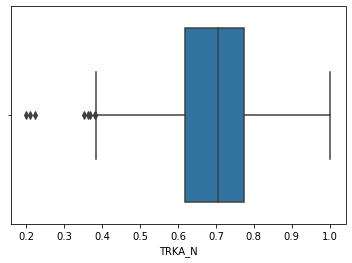

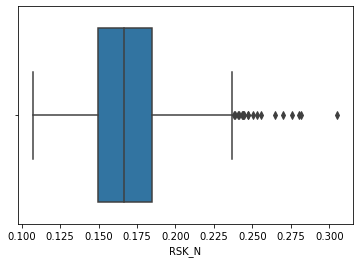

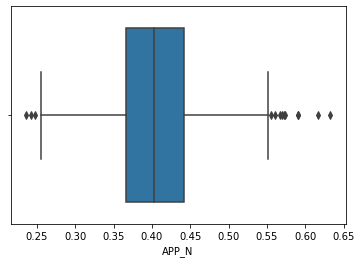

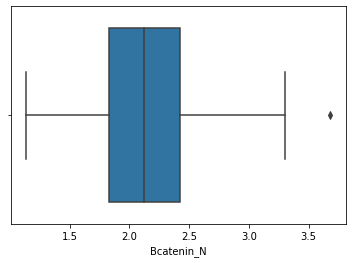

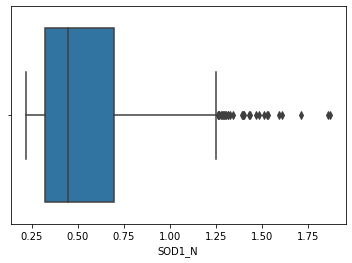

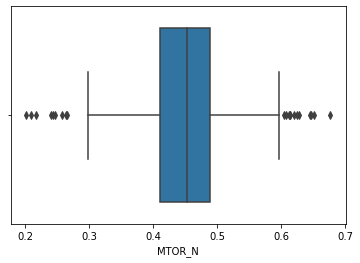

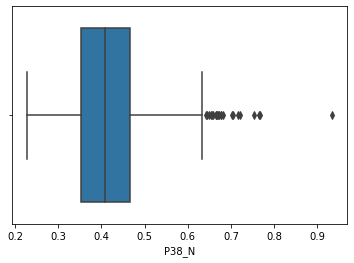

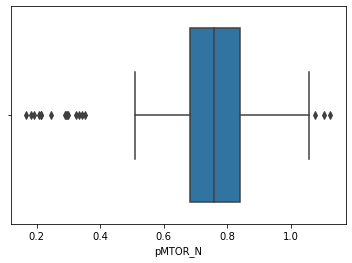

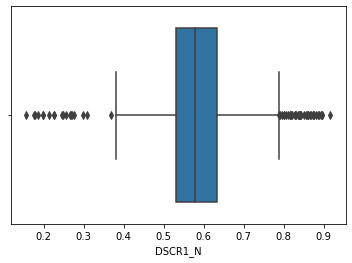

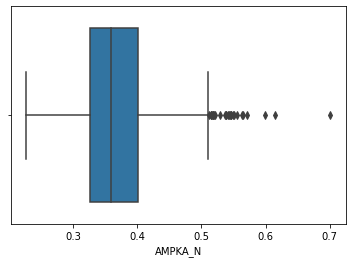

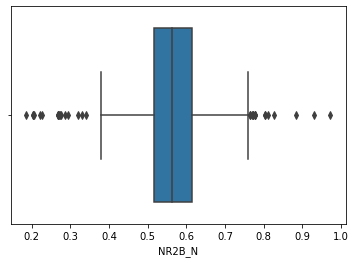

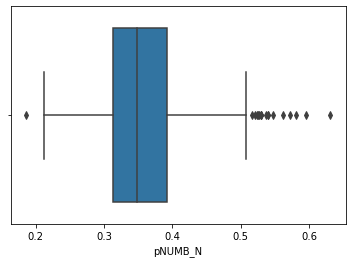

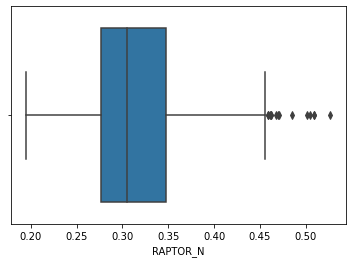

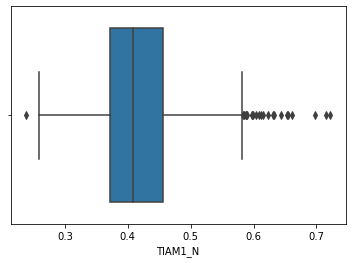

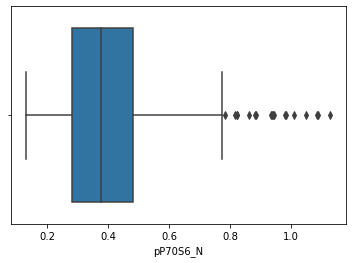

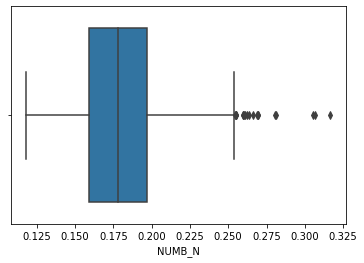

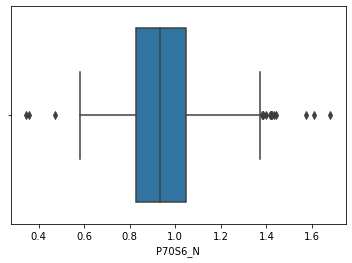

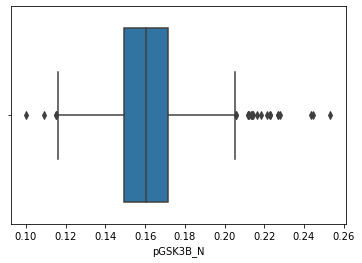

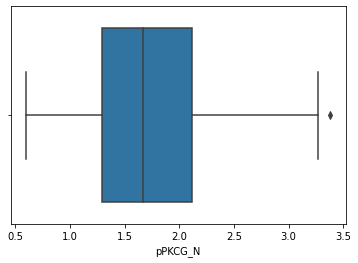

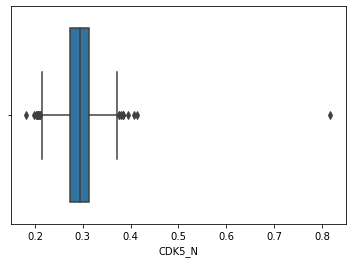

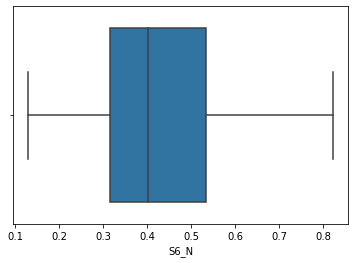

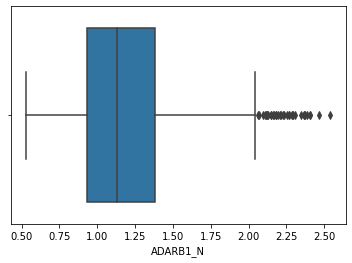

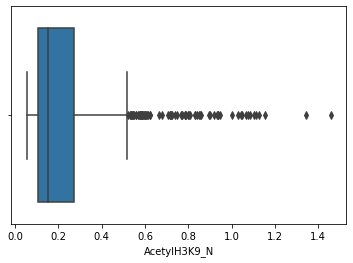

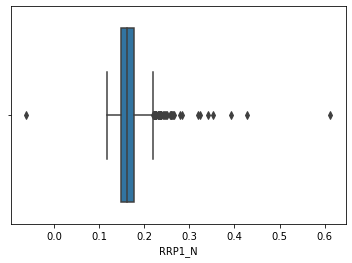

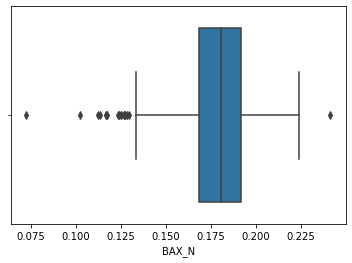

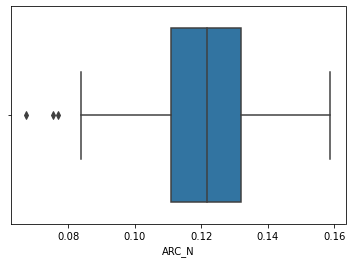

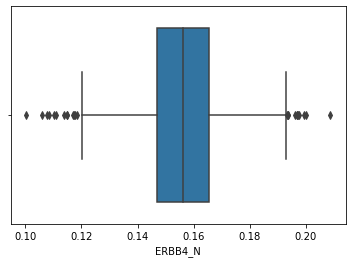

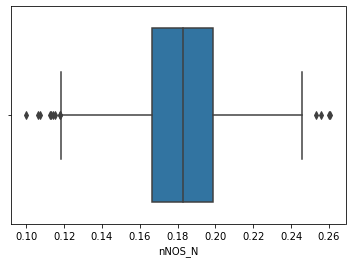

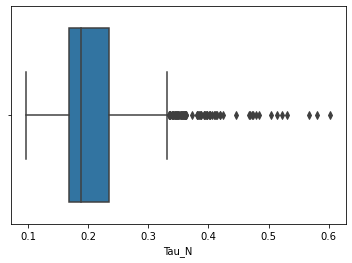

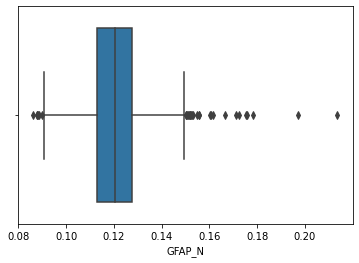

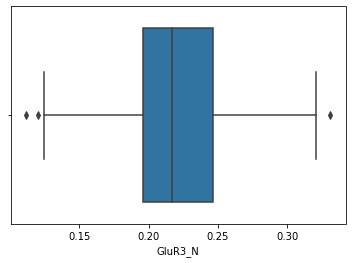

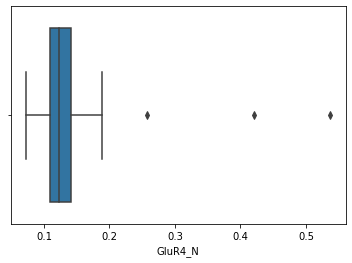

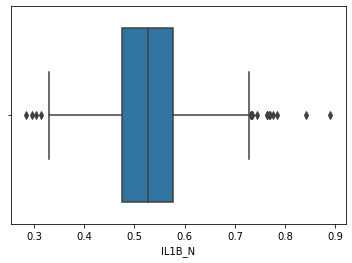

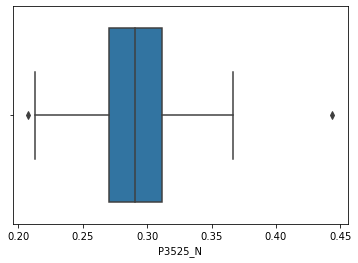

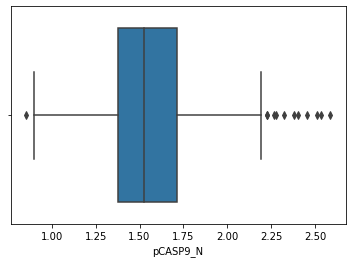

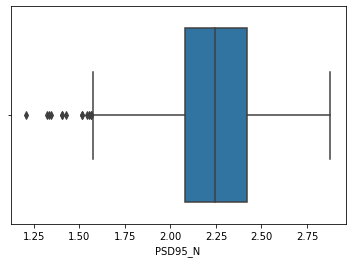

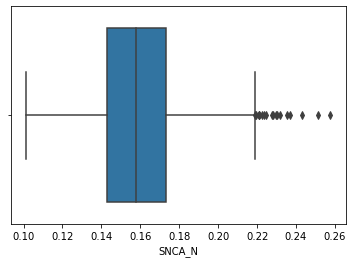

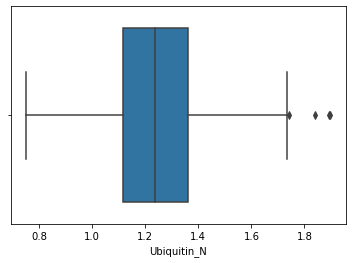

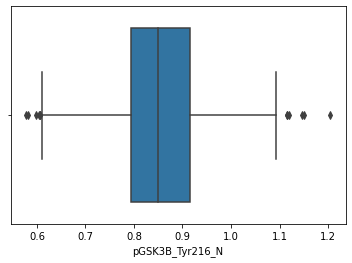

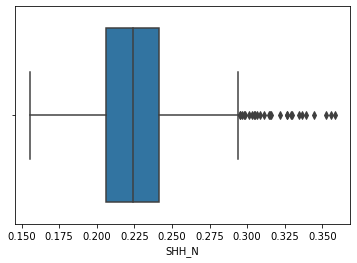

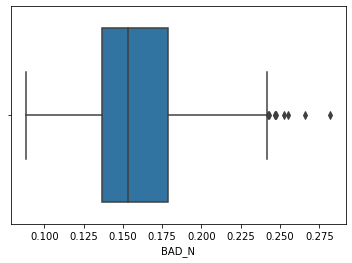

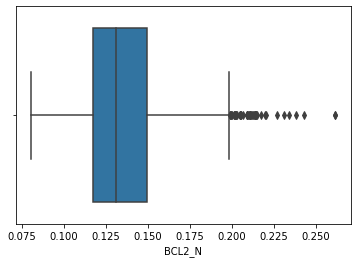

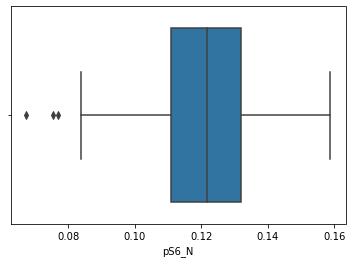

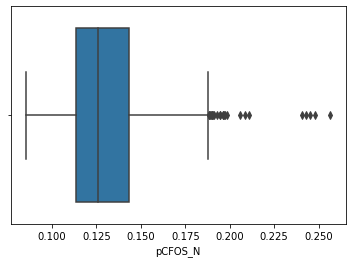

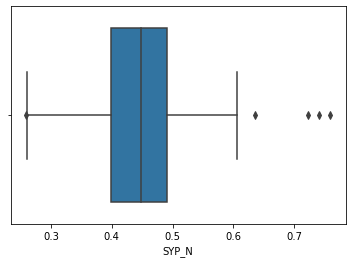

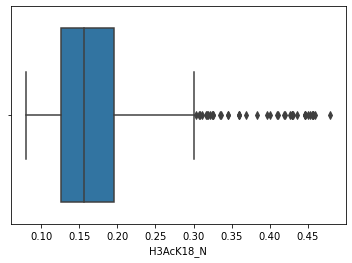

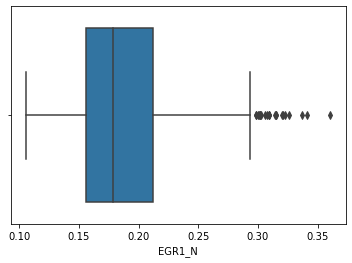

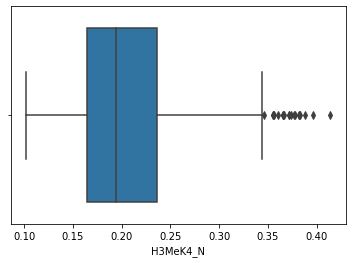

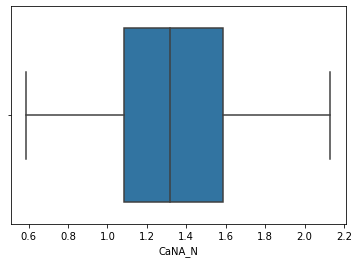

In [80]:
for feature in new_data.columns[:-4]:
    sns.boxplot(x=new_data[feature])
    plt.show()

<AxesSubplot:>

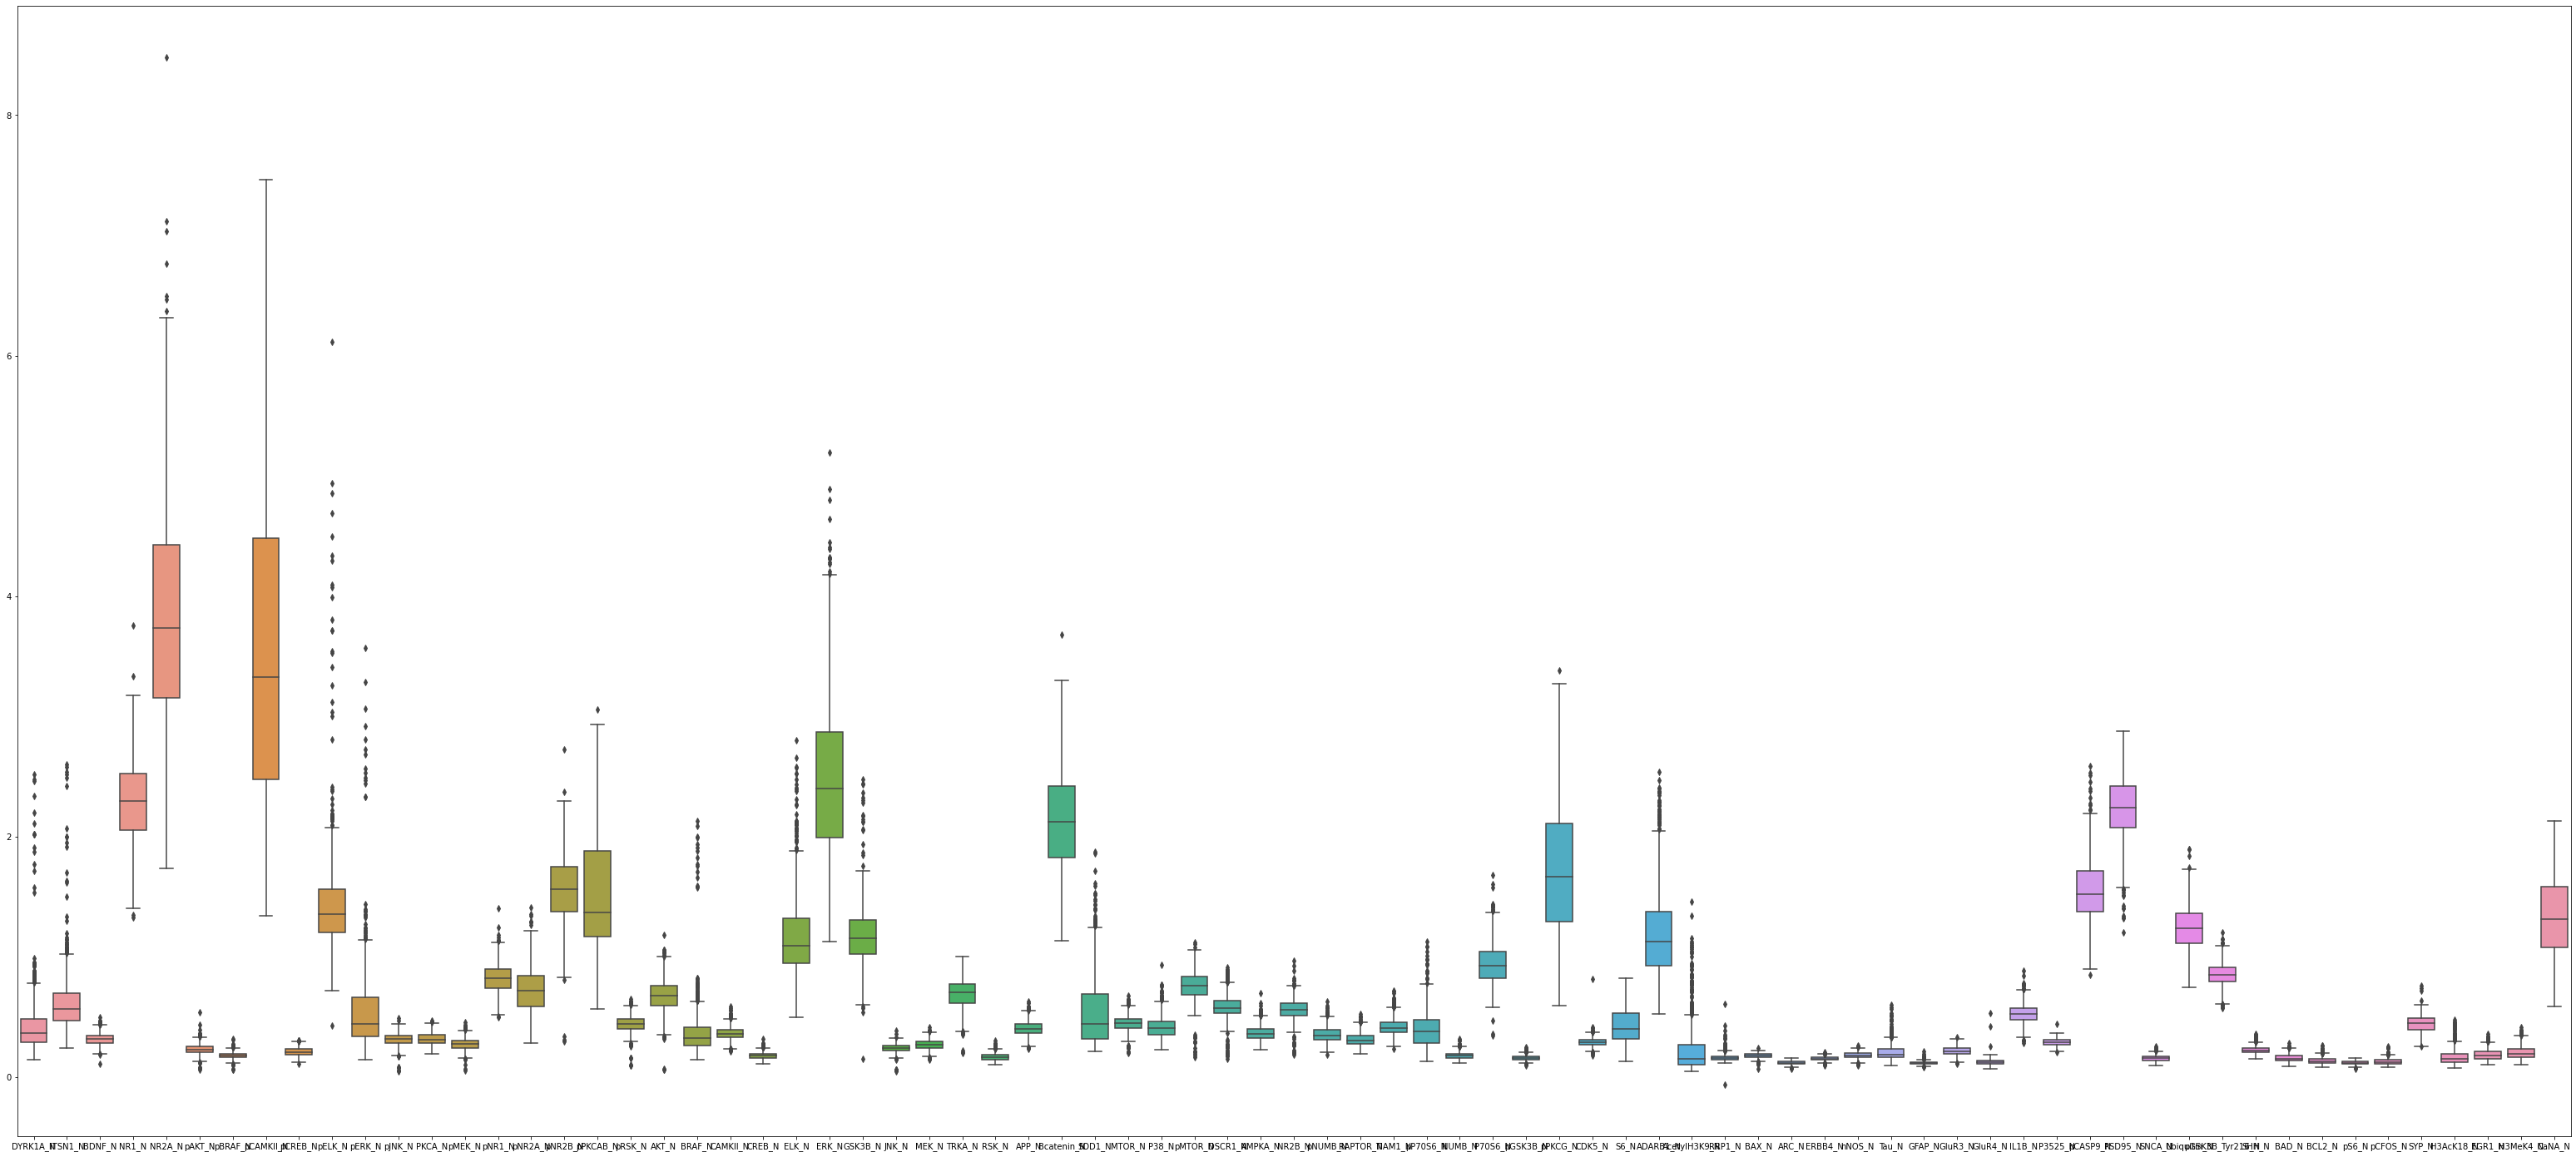

In [76]:
plt.figure(figsize=(55,25))
sns.boxplot(data=new_data.iloc[:,:-4])

In [102]:
for feature in new_data.columns[:-4]:
    q1=new_data.describe()[feature]['25%']
    q3=new_data.describe()[feature]['75%']
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    lb_outlier=[]
    ub_outlier=[]
    for data in new_data[feature]:
        if data<lower_bound:
            lb_outlier.append(data)
        elif data>upper_bound:
            ub_outlier.append(data)
    print(f'{feature}:  {len(lb_outlier)} numbers of data below lower bound & {len(ub_outlier)} numbers of data above upper bound')



DYRK1A_N:  0 numbers of data below lower bound & 48 numbers of data above upper bound
ITSN1_N:  0 numbers of data below lower bound & 45 numbers of data above upper bound
BDNF_N:  3 numbers of data below lower bound & 19 numbers of data above upper bound
NR1_N:  2 numbers of data below lower bound & 2 numbers of data above upper bound
NR2A_N:  0 numbers of data below lower bound & 7 numbers of data above upper bound
pAKT_N:  7 numbers of data below lower bound & 12 numbers of data above upper bound
pBRAF_N:  6 numbers of data below lower bound & 14 numbers of data above upper bound
pCAMKII_N:  0 numbers of data below lower bound & 0 numbers of data above upper bound
pCREB_N:  1 numbers of data below lower bound & 7 numbers of data above upper bound
pELK_N:  1 numbers of data below lower bound & 41 numbers of data above upper bound
pERK_N:  0 numbers of data below lower bound & 36 numbers of data above upper bound
pJNK_N:  9 numbers of data below lower bound & 2 numbers of data above up

## Correlation

In [81]:
new_data.corr()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
DYRK1A_N   1.000000  0.959497  0.359476  0.294662  0.325150 -0.181077   
ITSN1_N    0.959497  1.000000  0.459890  0.422379  0.425934 -0.147808   
BDNF_N     0.359476  0.459890  1.000000  0.805576  0.749591  0.317375   
NR1_N      0.294662  0.422379  0.805576  1.000000  0.874018  0.210856   
NR2A_N     0.325150  0.425934  0.749591  0.874018  1.000000  0.109332   
...             ...       ...       ...       ...       ...       ...   
CaNA_N     0.475714  0.517592  0.262337  0.204627  0.186180 -0.238147   
Genotype   0.088901  0.173108 -0.044232 -0.112728 -0.162030  0.092261   
Treatment -0.010858 -0.031513 -0.067071 -0.065437  0.008671  0.130399   
Behavior  -0.505733 -0.483519 -0.145669 -0.020462 -0.114474  0.352481   
class     -0.139123 -0.052580 -0.086450 -0.091814 -0.190758  0.203336   

            pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N  \
DYRK1A_N  -0.093966  -0.179960  0.047142  0.791150  ... -0.239029 -0.047038   
ITSN1_N   -0.076578  -0.132781  0.171044  0.780807  ... -0.320239  0.042479   
BDNF_N     0.390123   0.246849  0.603641  0.451648  ... -0.261868  0.450404   
NR1_N      0.243022   0.301538  0.596519  0.417037  ... -0.372605  0.473657   
NR2A_N     0.109719   0.281213  0.391579  0.409982  ... -0.423476  0.400960   
...             ...        ...       ...       ...  ...       ...       ...   
CaNA_N    -0.212954  -0.376026  0.039832  0.233293  ... -0.311206  0.246107   
Genotype   0.014632   0.025090  0.172792 -0.034055  ... -0.087406 -0.227713   
Treatment  0.185952   0.188350 -0.082001 -0.003081  ...  0.028865  0.010898   
Behavior   0.318609   0.486892  0.238693 -0.287521  ...  0.230382  0.072460   
class      0.109919   0.190956  0.269366 -0.152616  ...  0.017829 -0.167216   

           H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  \
DYRK1A_N   -0.299244 -0.349252 -0.382665  0.475714  0.088901  -0.010858   
ITSN1_N    -0.287900 -0.431270 -0.426376  0.517592  0.173108  -0.031513   
BDNF_N     -0.130532 -0.220677 -0.266771  0.262337 -0.044232  -0.067071   
NR1_N      -0.220880 -0.329417 -0.360583  0.204627 -0.112728  -0.065437   
NR2A_N     -0.298031 -0.355181 -0.449335  0.186180 -0.162030   0.008671   
...              ...       ...       ...       ...       ...        ...   
CaNA_N     -0.280223 -0.460988 -0.447072  1.000000  0.045850  -0.125451   
Genotype    0.262519 -0.200641  0.147634  0.045850  1.000000   0.003096   
Treatment   0.086018  0.173936  0.058460 -0.125451  0.003096   1.000000   
Behavior    0.358493  0.391495  0.471567 -0.748772  0.029378  -0.029378   
class       0.362110 -0.041467  0.317850 -0.256302  0.873204  -0.225300   

           Behavior     class  
DYRK1A_N  -0.505733 -0.139123  
ITSN1_N   -0.483519 -0.052580  
BDNF_N    -0.145669 -0.086450  
NR1_N     -0.020462 -0.091814  
NR2A_N    -0.114474 -0.190758  
...             ...       ...  
CaNA_N    -0.748772 -0.256302  
Genotype   0.029378  0.873204  
Treatment -0.029378 -0.225300  
Behavior   1.000000  0.462728  
class      0.462728  1.000000  

[81 rows x 81 columns]

In [82]:
new_data.corr()['pBRAF_N'].sort_values(ascending=False)

pBRAF_N    1.000000
pMEK_N     0.841918
pAKT_N     0.825155
CREB_N     0.807205
RSK_N      0.778677
             ...   
GluR4_N   -0.105127
NUMB_N    -0.195081
CaNA_N    -0.212954
S6_N      -0.218031
GluR3_N   -0.221635
Name: pBRAF_N, Length: 81, dtype: float64

<AxesSubplot:>

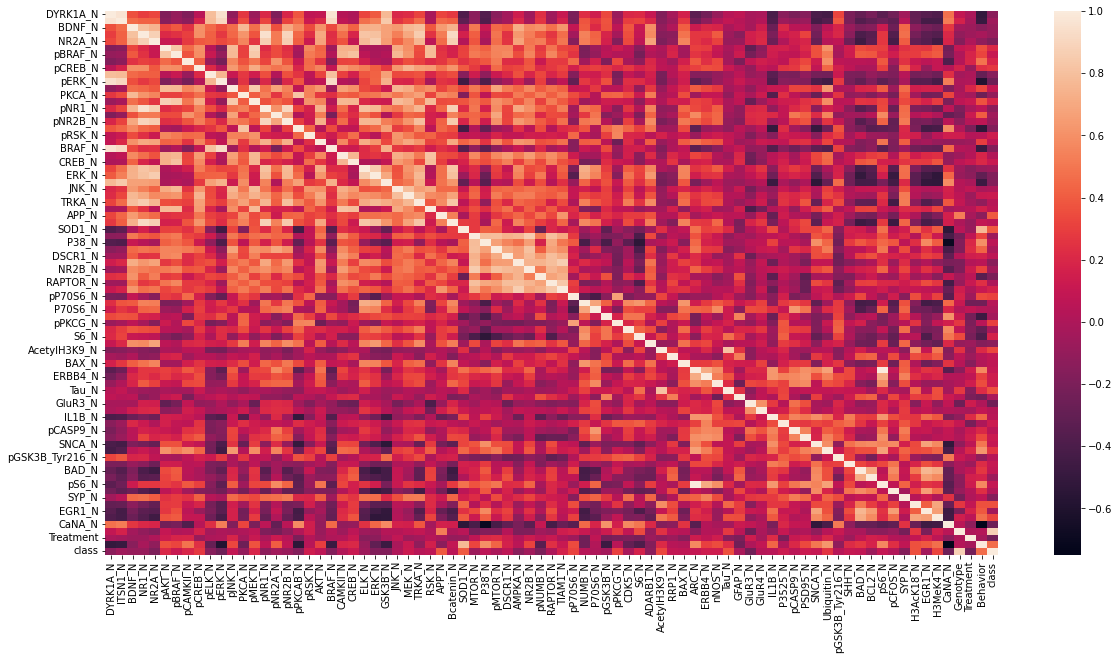

In [83]:
plt.figure(figsize=(20,10))
sns.heatmap(new_data.corr())